# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


In [225]:
import warnings
warnings.filterwarnings('ignore')

In [226]:
file_accidents = "2011_Accidents_UK.csv" 

In [227]:
df_accidents = pd.read_csv(file_accidents,index_col=0)

In [228]:
df_accidents.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,01BS70001,525590.0,178980.0,-0.192203,51.495766,Metropolitan Police,Slight,1,1,13/01/2011,Thursday,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Crossroads,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812
201101BS70002,2011,01BS70002,527450.0,179020.0,-0.165408,51.495710,Metropolitan Police,Serious,2,1,11/01/2011,Tuesday,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819
201101BS70003,2011,01BS70003,527120.0,178350.0,-0.170401,51.489763,Metropolitan Police,Slight,1,1,19/01/2011,Wednesday,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,304,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914
201101BS70005,2011,01BS70005,525400.0,179210.0,-0.194856,51.497875,Metropolitan Police,Slight,2,3,25/01/2011,Tuesday,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,first_road_class is C or Unclassified. These r...,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813
201101BS70007,2011,01BS70007,526280.0,177540.0,-0.182783,51.482671,Metropolitan Police,Slight,2,1,06/01/2011,Thursday,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913


In [229]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151474 entries, 201101BS70001 to 2011984147811
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                151474 non-null  int64  
 1   accident_reference                           151474 non-null  object 
 2   location_easting_osgr                        151474 non-null  float64
 3   location_northing_osgr                       151474 non-null  float64
 4   longitude                                    151474 non-null  float64
 5   latitude                                     151474 non-null  float64
 6   police_force                                 151474 non-null  object 
 7   accident_severity                            151474 non-null  object 
 8   number_of_vehicles                           151474 non-null  int64  
 9   number_of_casualties                         

In [230]:
info = list(df_accidents.columns)
info

['accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [231]:
numeric_columns = info[0:6] + [info[10]] + [info[12]] + [info[17]] + [info[23]] + [info[-1]]
numeric_columns

['accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'date',
 'time',
 'first_road_number',
 'second_road_number',
 'lsoa_of_accident_location']

In [232]:
df_accidents['date'] = pd.to_datetime(df_accidents['date'])
df_accidents.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,2011,01BS70001,525590.0,178980.0,-0.192203,51.495766,Metropolitan Police,Slight,1,1,2011-01-13,Thursday,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Crossroads,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812
201101BS70002,2011,01BS70002,527450.0,179020.0,-0.165408,51.495710,Metropolitan Police,Serious,2,1,2011-11-01,Tuesday,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819
201101BS70003,2011,01BS70003,527120.0,178350.0,-0.170401,51.489763,Metropolitan Police,Slight,1,1,2011-01-19,Wednesday,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,304,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914
201101BS70005,2011,01BS70005,525400.0,179210.0,-0.194856,51.497875,Metropolitan Police,Slight,2,3,2011-01-25,Tuesday,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,first_road_class is C or Unclassified. These r...,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813
201101BS70007,2011,01BS70007,526280.0,177540.0,-0.182783,51.482671,Metropolitan Police,Slight,2,1,2011-06-01,Thursday,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913


# 2- EDA

### Question 1: ``When are accidents more probable?``

## Accidents against time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


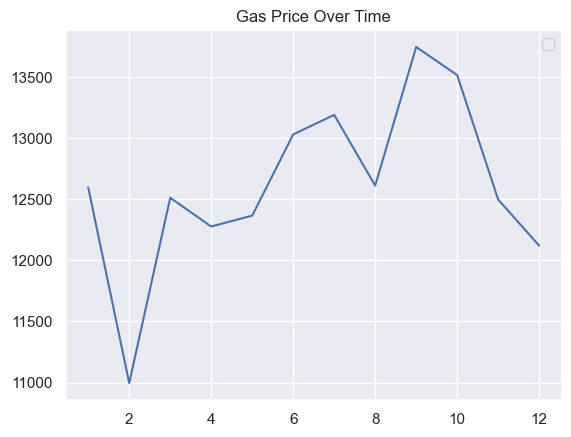

In [233]:
class_series = df_accidents.groupby(pd.DatetimeIndex(df_accidents['date']).month)['accident_reference'].count()
plt.plot(class_series.index, class_series)
plt.title('Accidents Over Time') #note here plt.title is used right away. However, when using the axes, we use plt.set_title()
plt.locator_params(integer=True) #to make ticks on axes integers
plt.legend(loc=1)

##  ``which days have more accidents``

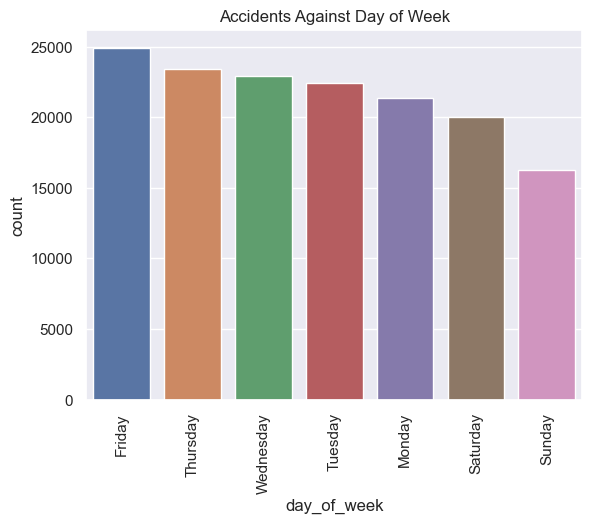

In [234]:
sns.set(style='darkgrid')
sns.countplot(x = 'day_of_week',
              data = df_accidents,
              order = df_accidents['day_of_week'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Accidents Against Day of Week')
plt.show()

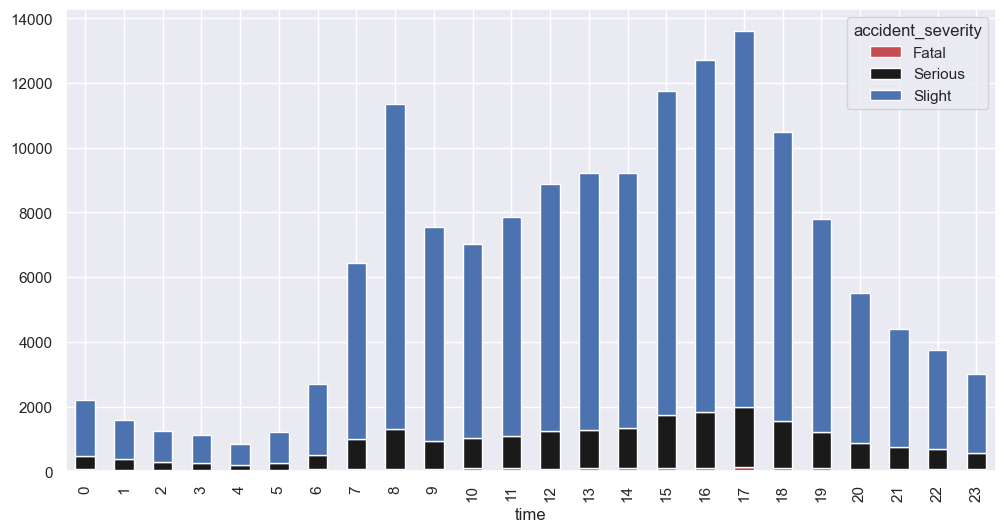

In [235]:
x = pd.crosstab(index=pd.to_datetime(df_accidents['time'], format='%H:%M').dt.hour,columns=df_accidents['accident_severity'])
x.plot(kind='bar',stacked=True, color=['r','k','b'],figsize=(12,6))
plt.show()

### Question 2: ``How do enviromental conditions influence severity? ``

In [236]:
df_accidents.accident_severity.unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

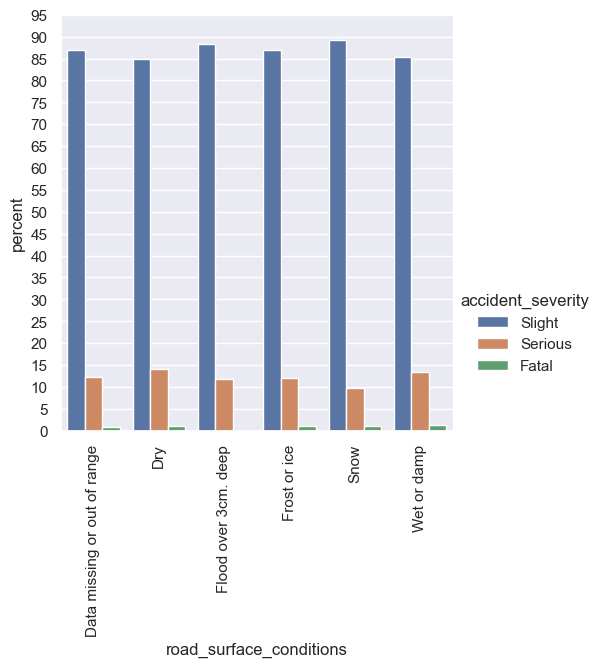

In [237]:

x,y = 'road_surface_conditions', 'accident_severity'

(df_accidents
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 100, 5.0))
plt.show()

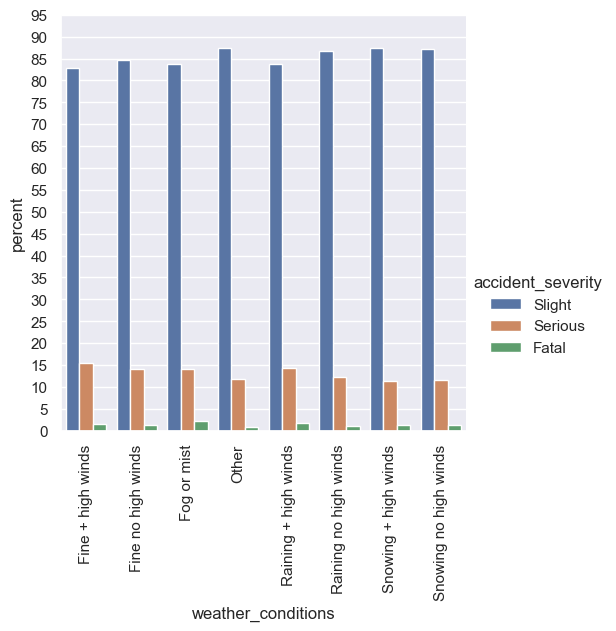

In [238]:

x,y = 'weather_conditions', 'accident_severity'

(df_accidents
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 100, 5.0))
plt.show()

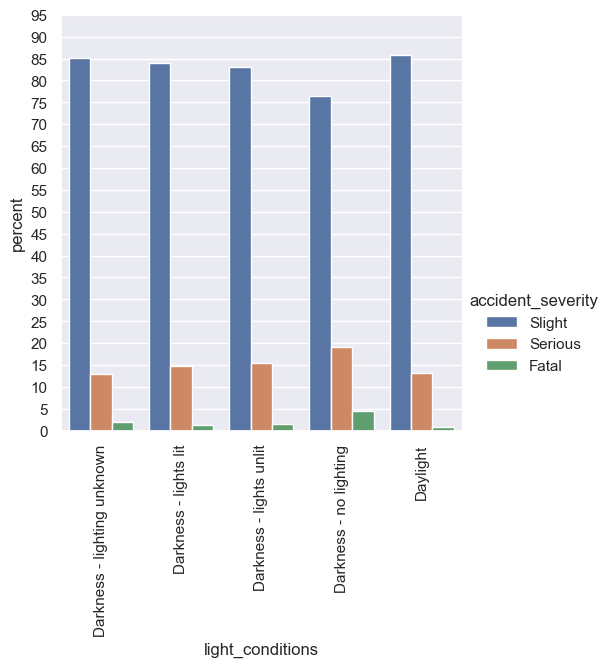

In [239]:
x,y = 'light_conditions', 'accident_severity'

(df_accidents
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 100, 5.0))
plt.show()

### Question3: ``Are certain junctions more likely to cause severe accidents?``

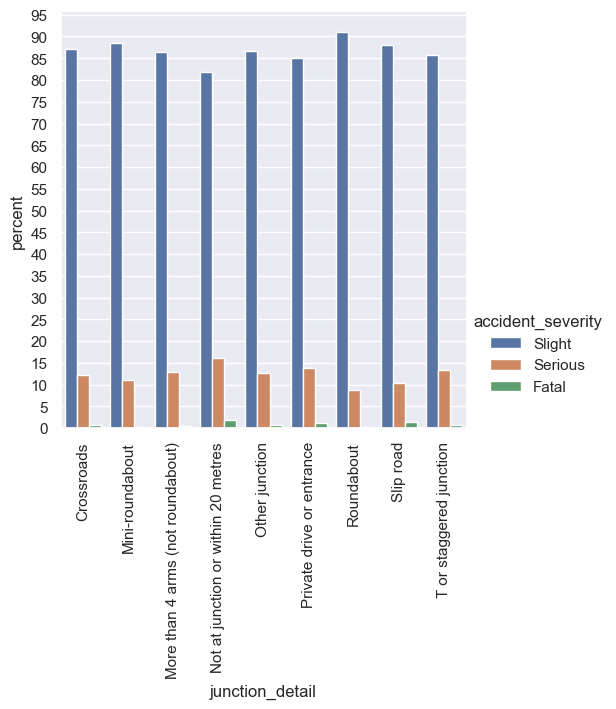

In [240]:
x,y =  'junction_detail','accident_severity'

(df_accidents
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 100, 5.0))
plt.show()

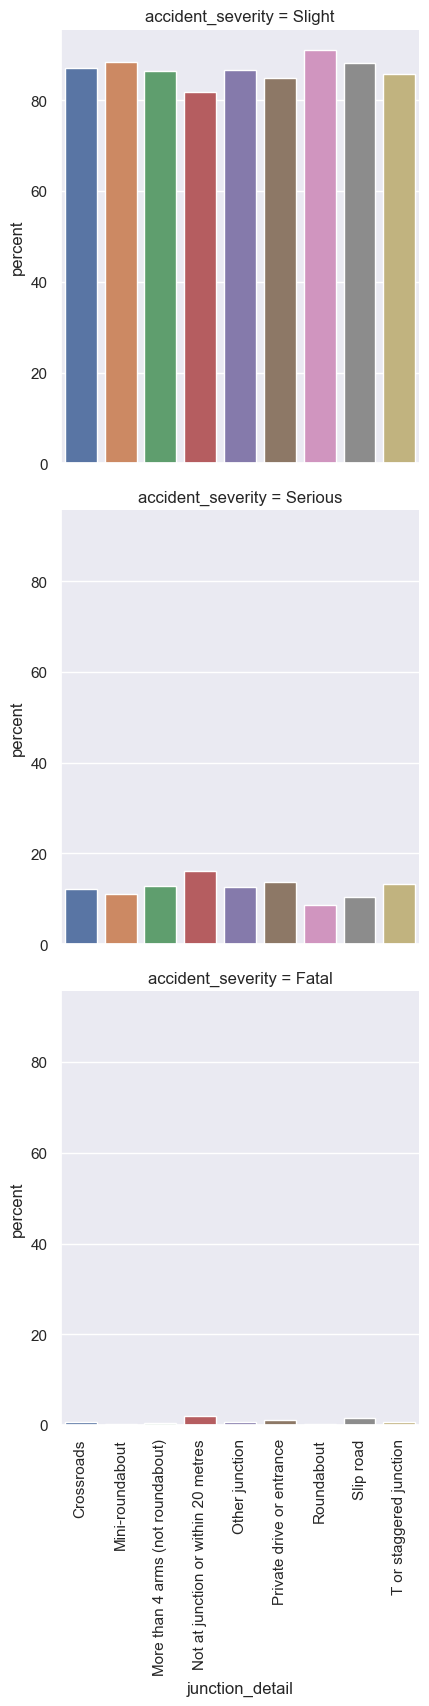

In [241]:
x,y =  'junction_detail','accident_severity'
(df_accidents
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',row=y,kind='bar'))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='number_of_casualties', ylabel='Density'>

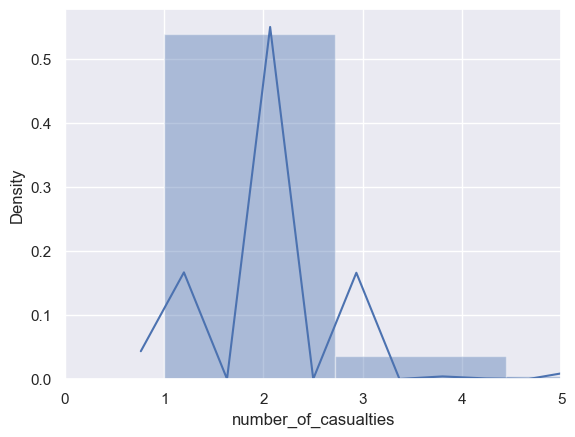

In [242]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_xbound(lower=0.0, upper=5)
ax.set_xlim([0, 5.00])
sns.distplot(df_accidents.number_of_casualties,ax=ax)

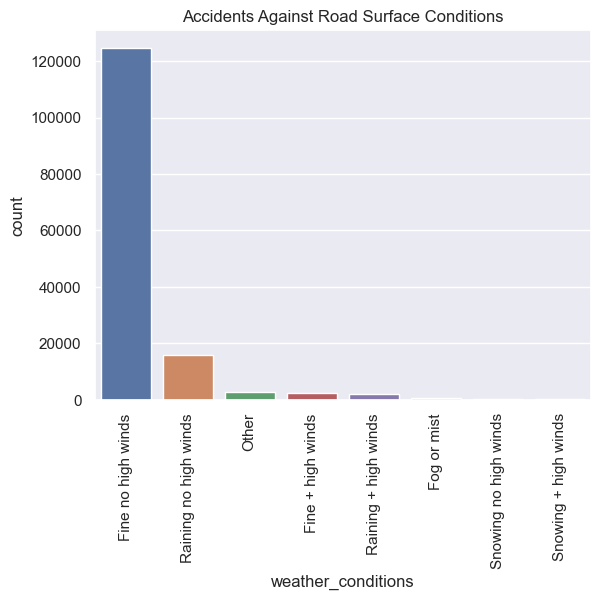

In [243]:
sns.set(style='darkgrid')
sns.countplot(x = 'weather_conditions',
              data = df_accidents,
              order = df_accidents['weather_conditions'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Accidents Against Road Surface Conditions')
plt.show()

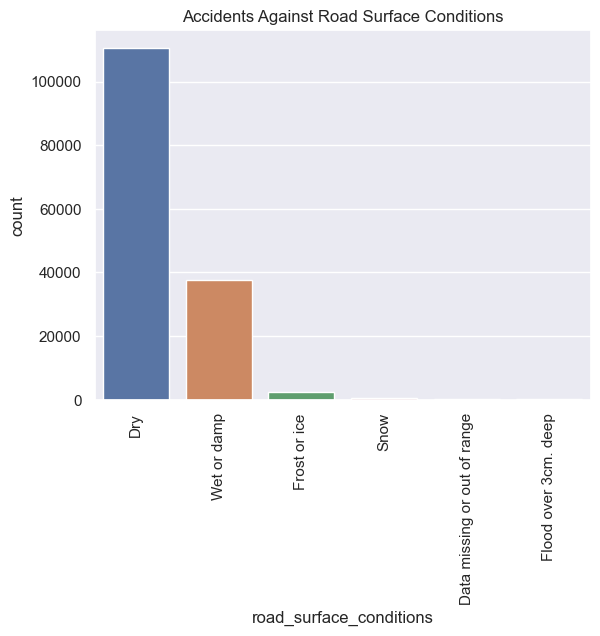

In [244]:
sns.set(style='darkgrid')
sns.countplot(x = 'road_surface_conditions',
              data = df_accidents,
              order = df_accidents['road_surface_conditions'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Accidents Against Road Surface Conditions')
plt.show()

### Question 4: `What Are The Top 10 Districts In Terms of Accident Frequency?`

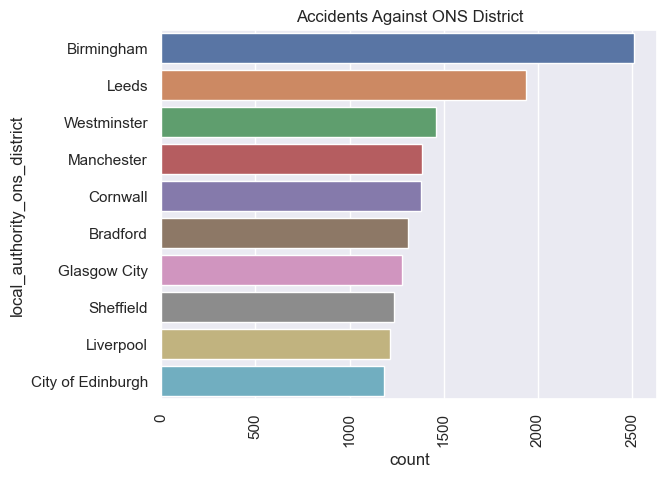

In [245]:
sns.set(style='darkgrid')
sns.countplot(y = 'local_authority_ons_district',
              data = df_accidents,
              order = df_accidents['local_authority_ons_district'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.title('Accidents Against ONS District')
plt.show()

### Question 5: `Which Road Speed Limits Have The Highest Percentage of Fatal Road Accidents?`

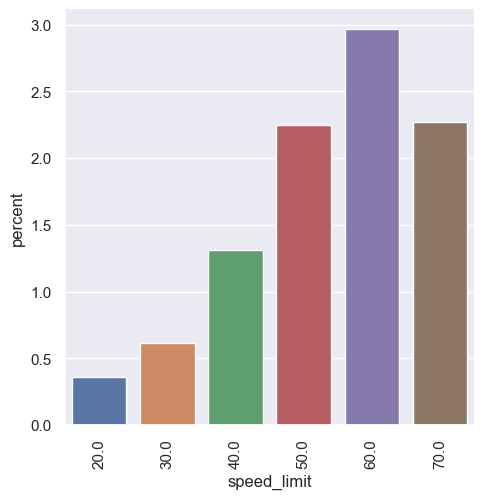

In [246]:
x,y =  'speed_limit','accident_severity'
(df_accidents
.groupby(x)[y]
.value_counts(normalize=True).loc[:,"Fatal"]
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',kind='bar'))
plt.xticks(rotation = 90)
plt.show()

# 3 - Cleaning Data

## Observing Missing and duplicate Data

### ``Investigating the missigness mechanism of second road number``

In [247]:
df_accidents.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,151474.0,151474.000000,1.514740e+05,151474.000000,151474.000000,151474.000000,151474.000000,151474.000000
mean,2011.0,442455.016775,2.964183e+05,-1.395452,52.555538,1.823118,1.346436,38.536118
std,0.0,95286.973106,1.611204e+05,1.400812,1.450786,0.710169,0.856727,13.865595
min,2011.0,65670.000000,1.110000e+04,-7.507468,49.920895,1.000000,1.000000,20.000000
25%,2011.0,379763.000000,1.774400e+05,-2.303150,51.482891,1.000000,1.000000,30.000000
50%,2011.0,445150.000000,2.579950e+05,-1.330088,52.205278,2.000000,1.000000,30.000000
75%,2011.0,524790.000000,3.949840e+05,-0.199122,53.450321,2.000000,1.000000,50.000000
max,2011.0,655370.000000,1.198000e+06,1.759382,60.662043,34.000000,87.000000,70.000000


In [248]:
df_accidents.isnull().mean()*100

accident_year                                   0.000000
accident_reference                              0.000000
location_easting_osgr                           0.000000
location_northing_osgr                          0.000000
longitude                                       0.000000
latitude                                        0.000000
police_force                                    0.000000
accident_severity                               0.000000
number_of_vehicles                              0.000000
number_of_casualties                            0.000000
date                                            0.000000
day_of_week                                     0.000000
time                                            0.000000
local_authority_district                        0.000000
local_authority_ons_district                    0.000000
local_authority_highway                         0.000000
first_road_class                                0.000000
first_road_number              

In [249]:
df_accidents[['first_road_class','first_road_number','second_road_class','second_road_number' ]].head()

,first_road_class,first_road_number,second_road_class,second_road_number
accident_index,,,,
201101BS70001,C,first_road_class is C or Unclassified. These r...,Unclassified,first_road_class is C or Unclassified. These r...
201101BS70002,C,first_road_class is C or Unclassified. These r...,Unclassified,first_road_class is C or Unclassified. These r...
201101BS70003,B,304,-1,NaN
201101BS70005,Unclassified,first_road_class is C or Unclassified. These r...,Unclassified,first_road_class is C or Unclassified. These r...
201101BS70007,A,3220,-1,NaN


In [250]:
df_accidents[['first_road_number' ]].head()

,first_road_number
accident_index,
201101BS70001,first_road_class is C or Unclassified. These r...
201101BS70002,first_road_class is C or Unclassified. These r...
201101BS70003,304
201101BS70005,first_road_class is C or Unclassified. These r...
201101BS70007,3220


In [251]:
df_accidents[df_accidents['second_road_number'].isnull()][['first_road_class','first_road_number','second_road_class','second_road_number']].head()

,first_road_class,first_road_number,second_road_class,second_road_number
accident_index,,,,
201101BS70003,B,304,-1,NaN
201101BS70007,A,3220,-1,NaN
201101BS70012,A,4,-1,NaN
201101BS70013,A,3217,-1,NaN
201101BS70014,A,3218,-1,NaN


In [252]:
df_accidents[df_accidents['second_road_number'].isnull()]['second_road_class'].unique()

array(['-1'], dtype=object)

In [253]:
df_accidents[df_accidents['second_road_number'].isnull()].isnull().mean()*100

accident_year                                    0.000000
accident_reference                               0.000000
location_easting_osgr                            0.000000
location_northing_osgr                           0.000000
longitude                                        0.000000
latitude                                         0.000000
police_force                                     0.000000
accident_severity                                0.000000
number_of_vehicles                               0.000000
number_of_casualties                             0.000000
date                                             0.000000
day_of_week                                      0.000000
time                                             0.000000
local_authority_district                         0.000000
local_authority_ons_district                     0.000000
local_authority_highway                          0.000000
first_road_class                                 0.000000
first_road_num

In [254]:
df_accidents[df_accidents['second_road_class']== '-1'][['second_road_number']].isnull().mean()*100

second_road_number    100.0
dtype: float64

In [255]:
df_secondRN_MAR = df_accidents.copy()
df_secondRN_MAR['RN_missing'] =  df_secondRN_MAR['second_road_number'].isnull()
df_secondRN_MAR['RN_missing'].mean()*100

39.94084793429896

In [256]:
for k,v in enumerate(df_secondRN_MAR):
    if(v not in numeric_columns):
        crosstab = pd.crosstab( df_secondRN_MAR[v],df_secondRN_MAR['RN_missing'])
        chi_result = stats.chi2_contingency(crosstab)
        print("p for: " + v + " is: " + str(chi_result[1]) + " Chi square result: " + str(chi_result[0]))
        if(chi_result[1]<0.0001):
            print(" missingness is dependent on: " + v)
        else:
            print(" missingness is INdependent on: " + v)

p for: police_force is: 0.0 Chi square result: 6997.218772522181
 missingness is dependent on: police_force
p for: accident_severity is: 1.6914209547195913e-210 Chi square result: 966.0346011029621
 missingness is dependent on: accident_severity
p for: number_of_vehicles is: 0.0 Chi square result: 8896.826674678929
 missingness is dependent on: number_of_vehicles
p for: number_of_casualties is: 7.856844411479442e-23 Chi square result: 161.7352882073112
 missingness is dependent on: number_of_casualties
p for: day_of_week is: 1.3122313142925874e-44 Chi square result: 219.52749703552047
 missingness is dependent on: day_of_week
p for: local_authority_district is: 0.0 Chi square result: 10929.227995103134
 missingness is dependent on: local_authority_district
p for: local_authority_ons_district is: 0.0 Chi square result: 10930.187889118835
 missingness is dependent on: local_authority_ons_district
p for: local_authority_highway is: 0.0 Chi square result: 9444.285358262769
 missingness is 

In [257]:
df_accidents[df_accidents.second_road_number.isnull()]['junction_detail'].value_counts()

Not at junction or within 20 metres    58621
Private drive or entrance               1404
Other junction                           467
T or staggered junction                    6
More than 4 arms (not roundabout)          1
Roundabout                                 1
Name: junction_detail, dtype: int64

## Second Road Number Is MAR

#### Second road number is missing at random where the absence of values for second road number is likely due to this data not being applicable for this object. It is MAR (Missing At Random) Where Second road number being missing depends on the value of Second road class.

##  ``Investigating the missingness mechanism of the attribute road_type: ``

In [258]:
df_accidents["road_type"].isnull().mean()*100

0.4812707131256849

In [259]:
df_accidents[df_accidents["road_type"].isnull()].nunique()

accident_year                                    1
accident_reference                             729
location_easting_osgr                          721
location_northing_osgr                         716
longitude                                      726
latitude                                       726
police_force                                    38
accident_severity                                3
number_of_vehicles                               5
number_of_casualties                             7
date                                           310
day_of_week                                      7
time                                           351
local_authority_district                       180
local_authority_ons_district                   180
local_authority_highway                        107
first_road_class                                 5
first_road_number                              192
road_type                                        0
speed_limit                    

In [260]:
df_accidents[df_accidents["urban_or_rural_area"]=='Urban']["road_type"].isnull().mean()*100

0.5023961983005114

In [261]:
df_road_type_MAR = df_accidents.copy()
df_road_type_MAR['road_type_missing'] =  df_road_type_MAR['road_type'].isnull()
df_road_type_MAR['road_type_missing'].mean()*100

0.4812707131256849

In [262]:
for k,v in enumerate(df_road_type_MAR):
    if(v not in numeric_columns):
        crosstab = pd.crosstab(df_road_type_MAR['road_type_missing'], df_road_type_MAR[v])
        chi_result = stats.chi2_contingency(crosstab)
        print("p for: " + v + " is: " + str(chi_result[1]) + " Chi square result: " + str(chi_result[0]))
        if(chi_result[1]<0.0001):
            print(" missingness is dependent on: " + v)
        else:
            print(" missingness is INdependent on: " + v)


p for: police_force is: 3.235887009247961e-271 Chi square result: 1452.3646274326786
 missingness is dependent on: police_force
p for: accident_severity is: 0.00143197399137529 Chi square result: 13.097402746112092
 missingness is INdependent on: accident_severity
p for: number_of_vehicles is: 2.524197355244799e-07 Chi square result: 56.161701716878476
 missingness is dependent on: number_of_vehicles
p for: number_of_casualties is: 0.8368061438183277 Chi square result: 16.41785387972086
 missingness is INdependent on: number_of_casualties
p for: day_of_week is: 0.031521258965761405 Chi square result: 13.83612676935977
 missingness is INdependent on: day_of_week
p for: local_authority_district is: 5.106908569439037e-268 Chi square result: 2279.6275567194325
 missingness is dependent on: local_authority_district
p for: local_authority_ons_district is: 1.2539059145791965e-267 Chi square result: 2279.6276667523393
 missingness is dependent on: local_authority_ons_district
p for: local_auth

In [263]:
df_accidents[df_accidents.road_type.isnull()].first_road_class.value_counts(normalize= True)

Unclassified    0.551440
A               0.264746
B               0.083676
C               0.071331
Motorway        0.028807
Name: first_road_class, dtype: float64

In [264]:
df_accidents.first_road_class.value_counts(normalize= True)

A               0.461393
Unclassified    0.278701
B               0.128821
C               0.092669
Motorway        0.035511
A(M)            0.002905
Name: first_road_class, dtype: float64

In [265]:
df_accidents[df_accidents.road_type.isnull()].local_authority_district.value_counts(normalize= True),\
len(df_accidents[df_accidents.road_type.isnull()].local_authority_district.value_counts(normalize= True))

(Cardiff                  0.045267
 Shropshire               0.035665
 Carmarthenshire          0.023320
 Manchester               0.021948
 Neath Port Talbot        0.021948
                            ...   
 Warrington               0.001372
 Halton                   0.001372
 Basingstoke and Deane    0.001372
 Milton Keynes            0.001372
 South Ayrshire           0.001372
 Name: local_authority_district, Length: 180, dtype: float64,
 180)

In [266]:
df_accidents.local_authority_district.value_counts(normalize= True),\
len(df_accidents.local_authority_district.value_counts(normalize= True))

(Birmingham                   0.016557
 Leeds                        0.012768
 Westminster                  0.009612
 Manchester                   0.009150
 Cornwall                     0.009097
                                ...   
 Clackmannanshire             0.000429
 Western Isles                0.000224
 Shetland Islands             0.000211
 London Airport (Heathrow)    0.000165
 Orkney Islands               0.000086
 Name: local_authority_district, Length: 380, dtype: float64,
 380)

In [267]:
df_accidents[df_accidents.road_type.isnull()].junction_detail.value_counts()

Not at junction or within 20 metres    360
T or staggered junction                150
Other junction                          77
Crossroads                              47
Private drive or entrance               35
Roundabout                              25
More than 4 arms (not roundabout)       24
Slip road                                9
Mini-roundabout                          2
Name: junction_detail, dtype: int64

In [268]:
df_accidents[df_accidents.road_type.isnull() == False].junction_detail.value_counts()

Not at junction or within 20 metres    58279
T or staggered junction                48669
Crossroads                             14934
Roundabout                             13657
Private drive or entrance               5725
Other junction                          3625
Slip road                               2049
More than 4 arms (not roundabout)       2034
Mini-roundabout                         1773
Name: junction_detail, dtype: int64

In [269]:
df_accidents.junction_detail.value_counts(normalize = True)

Not at junction or within 20 metres    0.387123
T or staggered junction                0.322293
Crossroads                             0.098901
Roundabout                             0.090326
Private drive or entrance              0.038026
Other junction                         0.024440
More than 4 arms (not roundabout)      0.013586
Slip road                              0.013586
Mini-roundabout                        0.011718
Name: junction_detail, dtype: float64

## road_type is MAR

#### A Chi-Square test was conducted to possibly explain the missingness of the attribute road_type. The initial hypothesis was that conducting the test would point out the specific variables on which road_type is dependant and would thus highlight if the variable is MAR. To conduct the test, a new boolean column was created to indicate whether road_type is missing for this datapoint, and then the independence of that boolean attribute was tested against all other attributes. After conducting the test, it was discovered that the attribute road_type depends on multiple columns, with various degrees of dependence.

#### The most notable attributes on which road_type missingness is dependent on were the police force, the local authority district variables, and the first road class. This all leads us to conclude that the road_type is MAR, since the probability of it being missing highly depends on other observed variables in the dataset.

### ``Investigating the missigness mechanism of weather conditions``

In [270]:
df_accidents.weather_conditions.unique()

array(['Raining no high winds', 'Fine no high winds', 'Other',
       'Fine + high winds', 'Raining + high winds', nan,
       'Snowing no high winds', 'Fog or mist', 'Snowing + high winds'],
      dtype=object)

In [271]:
df_accidents[df_accidents.weather_conditions.isnull()]


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101CP00256,2011,01CP00256,532100.0,181860.0,-0.097398,51.520165,City of London,Slight,2,1,2011-11-08,Thursday,08:25,City of London,City of London,City of London,A,1,Single carriageway,30.0,T or staggered junction,Auto traffic signal,B,100.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,NaN,Dry,None,None,Urban,No,Non-trunk,E01000001
201101CP00257,2011,01CP00257,533210.0,180940.0,-0.081756,51.511637,City of London,Slight,2,1,2011-08-09,Thursday,07:45,City of London,City of London,City of London,C,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,NaN,Dry,None,None,Urban,No,Non-trunk,E01000004
201101CP00259,2011,01CP00259,531960.0,180860.0,-0.099789,51.511211,City of London,Slight,2,1,2011-12-08,Friday,07:45,City of London,City of London,City of London,A,3211,Dual carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,NaN,Dry,None,None,Urban,Yes,Non-trunk,E01000004
201101CP00276,2011,01CP00276,532770.0,181750.0,-0.087788,51.519020,City of London,Slight,2,1,2011-09-25,Sunday,00:13,City of London,City of London,City of London,A,501,Single carriageway,30.0,Crossroads,Auto traffic signal,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lighting unknown,NaN,Dry,Roadworks,None,Urban,No,Non-trunk,E01000004
201101CP00363,2011,01CP00363,532880.0,180840.0,-0.086546,51.510816,City of London,Slight,2,1,2011-11-29,Tuesday,07:40,City of London,City of London,City of London,C,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,10.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,NaN,Dry,None,None,Urban,Yes,Non-trunk,E01000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201197UC40405,2011,97UC40405,251720.0,623650.0,-4.348112,55.484139,Strathclyde,Slight,1,1,2011-07-05,Saturday,16:10,East Ayrshire,East Ayrshire,East Ayrshire,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,NaN,Wet or damp,None,None,Rural,No,Data missing or out of range,-1
201197UD01405,2011,97UD01405,235720.0,622710.0,-4.600482,55.470587,Strathclyde,Slight,2,1,2011-04-05,Wednesday,17:20,South Ayrshire,South Ayrshire,South Ayrshire,A,719,Dual carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,NaN,Dry,None,None,Urban,No,Data missing or out of range,-1
201197UD20803,2011,97UD20803,218430.0,597160.0,-4.857076,55.235174,Strathclyde,Slight,2,1,2011-04-03,Friday,07:50,South Ayrshire,South Ayrshire,South Ayrshire,Unclassified,first_road_class is C 

In [272]:
df_accidents[df_accidents.weather_conditions.isnull()].shape


(2622, 35)

In [273]:
df_accidents[df_accidents.weather_conditions == 'Raining no high winds'].road_surface_conditions.value_counts(dropna = False)

Wet or damp             15491
Frost or ice              128
Dry                       111
Flood over 3cm. deep       68
Snow                       15
Name: road_surface_conditions, dtype: int64

In [274]:
police_forces = df_accidents.police_force.value_counts().index

for k,v in enumerate(police_forces):
    df_test = df_accidents[df_accidents['police_force'] == v]
    percentage_missing =  df_test.weather_conditions.isnull().mean()*100
    print(v +": "+ str(percentage_missing) + " percent missing")
    print("-----------------------------------------")

Metropolitan Police: 0.2985941193547049 percent missing
-----------------------------------------
Thames Valley: 0.9612023767913317 percent missing
-----------------------------------------
West Yorkshire: 0.22213994816734545 percent missing
-----------------------------------------
West Midlands: 3.2805219012115563 percent missing
-----------------------------------------
Greater Manchester: 6.963136337039204 percent missing
-----------------------------------------
Hampshire: 0.06 percent missing
-----------------------------------------
Kent: 3.6572837476885147 percent missing
-----------------------------------------
Devon and Cornwall: 1.834862385321101 percent missing
-----------------------------------------
Strathclyde: 1.2524084778420037 percent missing
-----------------------------------------
Lancashire: 1.5471512770137525 percent missing
-----------------------------------------
Surrey: 5.070842654735272 percent missing
-----------------------------------------
Essex: 0.547

In [275]:
attendance = df_accidents.did_police_officer_attend_scene_of_accident.value_counts().index

for k,v in enumerate(attendance):
    df_test = df_accidents[df_accidents.did_police_officer_attend_scene_of_accident == v]
    percentage_missing =  df_test.weather_conditions.isnull().mean()*100
    print(v +": "+ str(percentage_missing) + " percent missing")
    print("-----------------------------------------")

Yes: 0.9439417508938533 percent missing
-----------------------------------------
No: 5.09916001533582 percent missing
-----------------------------------------


### Upon further examination of the data at hand, it was determined that there is a clear tendency of the weather conditions to not be reported when there is no police officer on scene. This concurs with our initial hypothesis that the weather conditions attribute is more likely to be missing when no police officer attended the scene. This logically makes sense as there is no police officer to record the weather condition of the scene and hence the data might go missing during reporting later on.

## Weather conditions is MAR. 
#### It is dependent on other columns, most notibly did_police_officer_attend_scene_of_accident

## -----------------------------------------------------------------------------------------------------------------------

## In some datasets, some missing values do not show up using the isnull() function, since they were filled using an arbitrary value such as "missing". Therefore, an analysis of the unique values is required.

In [276]:
for k,v in enumerate(df_accidents.columns):
    print("Unique Values for column: " + v)
    print(df_accidents[v].unique())
    print("-------------------------------------------------------------")

Unique Values for column: accident_year
[2011]
-------------------------------------------------------------
Unique Values for column: accident_reference
['01BS70001' '01BS70002' '01BS70003' ... '984146011' '984146411'
 '984147811']
-------------------------------------------------------------
Unique Values for column: location_easting_osgr
[525590. 527450. 527120. ... 306780. 316740. 315210.]
-------------------------------------------------------------
Unique Values for column: location_northing_osgr
[178980. 179020. 178350. ... 593150. 609140. 583760.]
-------------------------------------------------------------
Unique Values for column: longitude
[-0.192203 -0.165408 -0.170401 ... -3.514288 -3.30773  -3.32901 ]
-------------------------------------------------------------
Unique Values for column: latitude
[51.495766 51.49571  51.489763 ... 55.366895 55.141194 55.059182]
-------------------------------------------------------------
Unique Values for column: police_force
['Metropol

['No physical crossing facilities within 50 metres'
 'Pedestrian phase at traffic signal junction' 'Zebra'
 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing'
 'Central refuge' 'Footbridge or subway']
-------------------------------------------------------------
Unique Values for column: light_conditions
['Darkness - lights lit' 'Daylight' 'Darkness - no lighting'
 'Darkness - lighting unknown' 'Darkness - lights unlit']
-------------------------------------------------------------
Unique Values for column: weather_conditions
['Raining no high winds' 'Fine no high winds' 'Other' 'Fine + high winds'
 'Raining + high winds' nan 'Snowing no high winds' 'Fog or mist'
 'Snowing + high winds']
-------------------------------------------------------------
Unique Values for column: road_surface_conditions
['Wet or damp' 'Dry' 'Frost or ice' 'Snow' 'Flood over 3cm. deep'
 'Data missing or out of range']
-------------------------------------------------------------
Uniqu

### ``Investigating the missigness mechanism of road_surface_conditions``

### The "Data missing or out of range" indicates incomplete data for the road_surface_conditions. It is incomplete since the road surface conditions cannot be actually absent in the real world, thus the data being missing in the dataset signifies incomplete data.

In [277]:
df_accidents.road_surface_conditions.unique()

array(['Wet or damp', 'Dry', 'Frost or ice', 'Snow',
       'Flood over 3cm. deep', 'Data missing or out of range'],
      dtype=object)

In [278]:
df_accidents[df_accidents.road_surface_conditions == 'Data missing or out of range']


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201104AM11026,2011,04AM11026,333580.0,434950.0,-3.010101,53.806583,Lancashire,Slight,1,1,2011-08-01,Saturday,23:45,Blackpool,Blackpool,Blackpool,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Private drive or entrance,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,NaN,Data missing or out of range,None,None,Urban,Yes,Non-trunk,E01012714
201104AX11091,2011,04AX11091,330640.0,436170.0,-3.055014,53.817162,Lancashire,Slight,1,1,2011-08-19,Friday,14:35,Blackpool,Blackpool,Blackpool,Unclassified,first_road_class is C or Unclassified. These r...,One way street,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,NaN,Data missing or out of range,None,None,Urban,Yes,Non-trunk,E01012736
201104BB11133,2011,04BB11133,345177.0,463639.0,-2.839176,54.065764,Lancashire,Slight,2,1,2011-03-10,Monday,07:30,Lancaster,Lancaster,Lancashire,B,5321,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,NaN,Data missing or out of range,None,None,Urban,Yes,Non-trunk,E01025164
201104BC11155,2011,04BC11155,332181.0,446965.0,-3.034001,53.914376,Lancashire,Slight,2,1,2011-09-08,Tuesday,13:50,Wyre,Wyre,Lancashire,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,NaN,Data missing or out of range,None,None,Urban,Yes,Non-trunk,E01025608
201104BC11160,2011,04BC11160,332608.0,447188.0,-3.027550,53.916436,Lancashire,Slight,2,1,2011-08-16,Tuesday,18:30,Wyre,Wyre,Lancashire,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,NaN,Data missing or out of range,None,None,Urban,Yes,Non-trunk,E01025573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011460205163,2011,460205163,598720.0,141820.0,0.839443,51.141086,Kent,Slight,3,1,2011-09-23,Friday,16:30,Ashford,Ashford,Kent,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,NaN,Data missing or out of range,None,None,Urban,No,Non-trunk,E01023994
2011460207103,2011,460207103,558670.0,138860.0,0.266138,51.126984,Kent,Slight,2,1,2011-09-11,Wednesday,18:05,Tunbridge Wells,Tunbridge Wells,Kent,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,Non

In [279]:
df_accidents[df_accidents.road_surface_conditions == 'Data missing or out of range'].shape


(222, 35)

In [280]:
df_accidents[df_accidents.road_surface_conditions == 'Wet or damp'].weather_conditions.value_counts(dropna = False)

Fine no high winds       16859
Raining no high winds    15491
Raining + high winds      1883
Other                     1563
Fine + high winds          782
Fog or mist                476
NaN                        388
Snowing no high winds       90
Snowing + high winds        15
Name: weather_conditions, dtype: int64

In [281]:
police_forces = df_accidents.police_force.value_counts().index

for k,v in enumerate(police_forces):
    df_test = df_accidents[df_accidents['police_force'] == v]
    percentage_missing =  ((df_test[df_test.road_surface_conditions == 'Data missing or out of range']).shape[0]\
                           /(df_test).shape[0])*100
    print(v +": "+ str(percentage_missing) + " percent missing")
    print("-----------------------------------------")

Metropolitan Police: 0.0 percent missing
-----------------------------------------
Thames Valley: 0.13981125480601186 percent missing
-----------------------------------------
West Yorkshire: 0.0 percent missing
-----------------------------------------
West Midlands: 0.0 percent missing
-----------------------------------------
Greater Manchester: 0.0 percent missing
-----------------------------------------
Hampshire: 0.0 percent missing
-----------------------------------------
Kent: 0.16437230326689953 percent missing
-----------------------------------------
Devon and Cornwall: 0.0 percent missing
-----------------------------------------
Strathclyde: 0.0 percent missing
-----------------------------------------
Lancashire: 0.3192534381139489 percent missing
-----------------------------------------
Surrey: 0.0 percent missing
-----------------------------------------
Essex: 0.0 percent missing
-----------------------------------------
Sussex: 0.0 percent missing
-----------------

In [282]:
attendance = df_accidents.did_police_officer_attend_scene_of_accident.value_counts().index

for k,v in enumerate(attendance):
    df_test = df_accidents[df_accidents.did_police_officer_attend_scene_of_accident == v]
    percentage_missing =  ((df_test[df_test.road_surface_conditions == 'Data missing or out of range']).shape[0]\
                           /(df_test).shape[0])*100
    print(v +": "+ str(percentage_missing) + " percent missing")
    print("-----------------------------------------")

Yes: 0.0570111497520015 percent missing
-----------------------------------------
No: 0.529782858736189 percent missing
-----------------------------------------


### As can be seen by the analysis conducted, the probability that the road_surface_conditions is missing depends on multiple other columns. For instance, it is more likely for road_surface_conditions to be missing in some police forces than others, which can be attributed to the police department policy (some departments may be stricter about filling out the accident reports). Furthermore, it can be seen that the road_surface_conditions is more likely to be missing when a police officer does not attend the scene of the accident.  This logically makes sense as there is no police officer to record the weather condition of the scene and hence the data might go missing during reporting later on.

## road_surface_conditions is MAR
#### Its missingness is dependent on other columns, such as police_force and did_police_officer_attend_scene_of_accident 

## In the junction_control attribute, the string "Data missing or out of range" indicates missing values. Hence, further exploration is required.

### ``Investigating the missigness mechanism of junction control``

In [283]:
df_accidents['junction_control'].value_counts()

Give way or uncontrolled        75584
Data missing or out of range    58686
Auto traffic signal             16173
Stop sign                         784
Authorised person                 247
Name: junction_control, dtype: int64

In [284]:
df_accidents[df_accidents.junction_control == 'Data missing or out of range'].junction_detail.unique()

array(['Not at junction or within 20 metres', 'Other junction',
       'Private drive or entrance', 'Crossroads',
       'T or staggered junction'], dtype=object)

In [285]:
df_accidents[df_accidents.junction_control == 'Data missing or out of range'].junction_detail.value_counts()

Not at junction or within 20 metres    58632
Other junction                            27
Private drive or entrance                 25
Crossroads                                 1
T or staggered junction                    1
Name: junction_detail, dtype: int64

## Due to the large number of objects taking the value "Data missing or out of range", and due to the nature of the variable itself, imputing/removing the values/objects is not an option. This is due to the fact that these values are truly missing in the real world, and thus imputing with another value will falsify the knowlede reflected by the dataset (given the junction control is a crucial aspect in a dataset like the one we are dealing with). As a result, we will not consider these to be missing values, but rather only indicators of the real world conditions. This is furthered demonstrated by observing the values of the attribute junction_detail, where it is obvious that this string value for junction_control is associated with a junction_detail that is not a junction or does not need/have junction control.

### ``Investigating the missigness mechanism of second road class``

## In the second_road_class attribute, the value -1 signifies that this accident object is one where the second road class does not apply. 

In [286]:
df_accidents[df_accidents.second_road_class == '-1'].junction_detail.value_counts()

Not at junction or within 20 metres    58621
Private drive or entrance               1404
Other junction                           467
T or staggered junction                    6
More than 4 arms (not roundabout)          1
Roundabout                                 1
Name: junction_detail, dtype: int64

## Thus, similar to what we did in the junction_control, we will consider these values to not be incomplete data, but rather an indication of values that are actually missing in the real world.

### ``Investigating the missigness mechanism of trunk road flag``

In [287]:
df_accidents.local_authority_highway.unique()

array(['Kensington and Chelsea', 'Westminster', 'Hammersmith and Fulham',
       'City of London', 'Hackney', 'Camden', 'Tower Hamlets',
       'Islington', 'Brent', 'Haringey', 'Hillingdon', 'Enfield',
       'Ealing', 'Waltham Forest', 'London Airport (Heathrow)',
       'Hounslow', 'Redbridge', 'Newham', 'Barking and Dagenham',
       'Havering', 'Lambeth', 'Southwark', 'Merton', 'Croydon',
       'Wandsworth', 'Lewisham', 'Greenwich', 'Bromley', 'Bexley',
       'Harrow', 'Barnet', 'Richmond upon Thames', 'Kingston upon Thames',
       'Sutton', 'Cumbria', 'Lancashire', 'Blackpool',
       'Blackburn with Darwen', 'Wirral', 'Sefton', 'Liverpool',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', 'Trafford', 'Bury', 'Rochdale',
       'Oldham', 'Cheshire West and Chester', 'Warrington', 'Halton',
       'Cheshire East', 'Northumberland', 'North Tyneside', 'Gateshead',
       'Sunderland', 'South Tyneside', 'Newcastle upon Ty

In [288]:
attendance = df_accidents.did_police_officer_attend_scene_of_accident.value_counts().index

for k,v in enumerate(attendance):
    df_test = df_accidents[df_accidents.did_police_officer_attend_scene_of_accident == v]
    percentage_missing =  (df_test[df_test.trunk_road_flag == 'Data missing or out of range'].shape[0]/df_test.shape[0])*100
    print(v +": "+ str(percentage_missing) + " percent missing")
    print("-----------------------------------------")

Yes: 11.311012110797098 percent missing
-----------------------------------------
No: 8.765815063957339 percent missing
-----------------------------------------


In [289]:
police_forces = df_accidents.police_force.value_counts().index

for k,v in enumerate(police_forces):
    df_test = df_accidents[df_accidents['police_force'] == v]
    percentage_missing =  (df_test[df_test.trunk_road_flag == 'Data missing or out of range'].shape[0]/df_test.shape[0])*100
    print(v +": "+ str(percentage_missing) + " percent missing")
    print("-----------------------------------------")

Metropolitan Police: 0.0 percent missing
-----------------------------------------
Thames Valley: 0.0 percent missing
-----------------------------------------
West Yorkshire: 0.0 percent missing
-----------------------------------------
West Midlands: 0.0 percent missing
-----------------------------------------
Greater Manchester: 0.0 percent missing
-----------------------------------------
Hampshire: 0.0 percent missing
-----------------------------------------
Kent: 0.0 percent missing
-----------------------------------------
Devon and Cornwall: 0.0 percent missing
-----------------------------------------
Strathclyde: 100.0 percent missing
-----------------------------------------
Lancashire: 0.0 percent missing
-----------------------------------------
Surrey: 0.0 percent missing
-----------------------------------------
Essex: 0.0 percent missing
-----------------------------------------
Sussex: 0.0 percent missing
-----------------------------------------
Avon and Somerset: 0

## As can clearly be seen by the analysis done in the above cell, the missingess of the trunk_road_flag is significantly dependent on the police force filing the report. For this case, it is apparent that some police forces completely ignore filling this attribute while other rigerously stick to filling it out (which could be department policy). As a result, the probability of the flag being missing depends on the police force filing the report. 

## Trunk road flag is MAR

### ``Investigating the missigness mechanism of lsoa of accident location``

## In the lsoa_of_accident_location attribute, a value of -1 indicates that the lsoa is missing. It cannot be the case that this value is missing in real life since it is a location attribute. Thus, -1 is missing data that needs to be handled.

In [290]:
df_accidents[(df_accidents['lsoa_of_accident_location'] == -1) | (df_accidents['lsoa_of_accident_location'] == '-1')].local_authority_district.value_counts()

Glasgow City             1280
Edinburgh, City of       1181
North Lanarkshire         569
Aberdeenshire             518
South Lanarkshire         512
Highland                  488
Fife                      448
West Lothian              382
Aberdeen City             360
Renfrewshire              353
Dumfries and Galloway     318
Perth and Kinross         293
Scottish Borders          275
Falkirk                   260
Dundee City               237
Argyll and Bute           230
North Ayrshire            229
Stirling                  220
Angus                     220
South Ayrshire            219
East Ayrshire             204
Midlothian                177
East Lothian              158
Inverclyde                155
West Dunbartonshire       145
East Dunbartonshire       140
Moray                     138
East Renfrewshire         116
Clackmannanshire           65
Western Isles              34
Shetland Islands           32
Orkney Islands             13
Gwynedd                     2
Cornwall  

In [291]:
authority_missing_lsoa = list(df_accidents[(df_accidents['lsoa_of_accident_location'] == -1) | (df_accidents['lsoa_of_accident_location'] == '-1')].local_authority_district.unique())
authority_missing_lsoa

['Cornwall',
 'Gwynedd',
 'Highland',
 'Western Isles',
 'Orkney Islands',
 'Shetland Islands',
 'Aberdeen City',
 'Aberdeenshire',
 'Moray',
 'Dundee City',
 'Perth and Kinross',
 'Angus',
 'Fife',
 'Edinburgh, City of',
 'Midlothian',
 'West Lothian',
 'Scottish Borders',
 'East Lothian',
 'Stirling',
 'Falkirk',
 'Clackmannanshire',
 'Glasgow City',
 'East Dunbartonshire',
 'East Renfrewshire',
 'East Ayrshire',
 'Renfrewshire',
 'Inverclyde',
 'Argyll and Bute',
 'West Dunbartonshire',
 'North Lanarkshire',
 'South Lanarkshire',
 'North Ayrshire',
 'South Ayrshire',
 'Dumfries and Galloway']

In [292]:
for authority in authority_missing_lsoa:
    n_missing_values = df_accidents[((df_accidents['lsoa_of_accident_location'] == -1) | (df_accidents['lsoa_of_accident_location'] == '-1') ) & (df_accidents['local_authority_district'] == authority)].shape[0]
    n_avialable_values = df_accidents[((df_accidents['lsoa_of_accident_location'] != -1) & (df_accidents['lsoa_of_accident_location'] != '-1')) & (df_accidents['local_authority_district'] == authority)].shape[0]
    print('For ', authority, 'the number of missing values is ', n_missing_values, ' the number of available values is ', n_avialable_values)

For  Cornwall the number of missing values is  2  the number of available values is  1376
For  Gwynedd the number of missing values is  2  the number of available values is  281
For  Highland the number of missing values is  488  the number of available values is  0
For  Western Isles the number of missing values is  34  the number of available values is  0
For  Orkney Islands the number of missing values is  13  the number of available values is  0
For  Shetland Islands the number of missing values is  32  the number of available values is  0
For  Aberdeen City the number of missing values is  360  the number of available values is  0
For  Aberdeenshire the number of missing values is  518  the number of available values is  0
For  Moray the number of missing values is  138  the number of available values is  0
For  Dundee City the number of missing values is  237  the number of available values is  0
For  Perth and Kinross the number of missing values is  293  the number of available

## lsoa_of_accident_location is MAR

#### Through this analysis, it was determined that lsoa_of_accident_location is MAR. This is due to the fact that it s missingness is dependant on the local_authority_district (and other similar location attributes that hold similar values to the local authority district, such as local_authority_ons_district). This can be clearly seen in the fact that certain authority districts are much more likely to have missing values for lsoa accident location.

### ``Investigating the missigness mechanism of light_conditions``

### In the light_conditions attribute, the "Darkness - lighting unknown" indicates incomplete data. It is incomplete since the light_conditions cannot be actually absent in the real world (the lights are either presenent on/off or not present), thus the data being missing in the dataset signifies incomplete data. 

In [293]:
df_accidents.light_conditions.unique()

array(['Darkness - lights lit', 'Daylight', 'Darkness - no lighting',
       'Darkness - lighting unknown', 'Darkness - lights unlit'],
      dtype=object)

In [294]:
df_accidents[df_accidents.light_conditions == 'Darkness - lighting unknown']

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101CP00276,2011,01CP00276,532770.0,181750.0,-0.087788,51.519020,City of London,Slight,2,1,2011-09-25,Sunday,00:13,City of London,City of London,City of London,A,501,Single carriageway,30.0,Crossroads,Auto traffic signal,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lighting unknown,NaN,Dry,Roadworks,None,Urban,No,Non-trunk,E01000004
201101CW12065,2011,01CW12065,529190.0,184190.0,-0.138463,51.541777,Metropolitan Police,Slight,2,1,2011-10-18,Tuesday,00:10,Camden,Camden,Camden,A,503,Single carriageway,30.0,Crossroads,Auto traffic signal,A,5202.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lighting unknown,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01000861
201101GD10242,2011,01GD10242,532810.0,182500.0,-0.086929,51.525750,Metropolitan Police,Slight,1,1,2011-06-05,Friday,02:42,Hackney,Hackney,Hackney,A,5201,Dual carriageway,30.0,Roundabout,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lighting unknown,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002704
201101GD10280,2011,01GD10280,535840.0,185120.0,-0.042268,51.548574,Metropolitan Police,Serious,1,3,2011-05-15,Sunday,21:35,Hackney,Hackney,Hackney,A,102,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lighting unknown,Fine no high winds,Dry,None,None,Urban,No,Non-trunk,E01001733
201101GD10532,2011,01GD10532,533530.0,184790.0,-0.075689,51.546160,Metropolitan Police,Serious,1,1,2011-07-08,Sunday,22:44,Hackney,Hackney,Hackney,A,104,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,A,10.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lighting unknown,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01001743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201197KB00401,2011,97KB00401,247010.0,666690.0,-4.446585,55.869067,Strathclyde,Slight,2,2,2011-01-01,Saturday,12:00,Renfrewshire,Renfrewshire,Renfrewshire,A,726,Single carriageway,50.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lighting unknown,Fine no high winds,Wet or damp,None,None,Rural,Yes,Data missing or out of range,-1
201197KC05202,2011,97KC05202,236210.0,668260.0,-4.619939,55.879610,Strathclyde,Slight,1,2,2011-02-19,Saturday,05:08,Inverclyde,Inverclyde,Inverclyde,A,761,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lighting unknown,Other,Snow,None,None,Rural,No,Data missing or out of range,-1
201197LA05407,2011,97LA05407,226720.0,683930.0,-4.781524,56.016918,Strathclyde,Slight,2,1,2011-07-24,Sunday,02:35,Argyll and Bute,Argyll and Bute,Argyll & Bute,A,814,Single carriageway,30.0,Not 

In [295]:
df_accidents[df_accidents.light_conditions == 'Darkness - lighting unknown'].shape


(1649, 35)

In [296]:
attendance = df_accidents.did_police_officer_attend_scene_of_accident.value_counts().index

for k,v in enumerate(attendance):
    df_test = df_accidents[df_accidents.did_police_officer_attend_scene_of_accident == v]
    percentage_missing =  ((df_test[df_test.light_conditions == 'Darkness - lighting unknown']).shape[0]\
                           /(df_test).shape[0])*100
    print(v +": "+ str(percentage_missing) + " percent missing")
    print("-----------------------------------------")

Yes: 0.8918172711205948 percent missing
-----------------------------------------
No: 1.9309191035516364 percent missing
-----------------------------------------


### As can be seen by the analysis conducted, the probability that the light_conditions is missing depends on multiple other columns. As can be seen, it is approximately double as likely for light_conditions to be missing when a police officer does not attend the scene of the accident.  This logically makes sense as there is no police officer to accurately record the light_conditions of the scene and hence the data might go missing during reporting later on.

## light_conditions is MAR
#### Its missingness is dependent on other columns, namely did_police_officer_attend_scene_of_accident 

### ``Investigating the missigness mechanism of local_authority_highway``

 ###  In the local_authority_highway attribute, the value "-1" indicates incomplete data.

In [297]:
df_accidents[df_accidents.trunk_road_flag == 'Non-trunk'].local_authority_highway.value_counts()

Kent                         3491
Surrey                       3406
Lancashire                   2952
Essex                        2870
Hampshire                    2797
                             ... 
Darlington                    220
Hartlepool                    130
Rutland                        73
London Airport (Heathrow)      25
Isles of Scilly                 1
Name: local_authority_highway, Length: 154, dtype: int64

### Initially we had hypothesized that a local_authority_highway value of -1 corresponds road_trunk_flag to be Non-trunk, meaning that for roads that are not highways (trunk_road_flag = Non-trunk) there is no local_authority highway and hence the -1 value. This does not seem to be the case after running the above query on the dataset.

In [298]:
100*((df_accidents[df_accidents.local_authority_highway == '-1'].shape[0])/df_accidents.shape[0])

0.6654607391367495

In [299]:
attendance = df_accidents.did_police_officer_attend_scene_of_accident.value_counts().index

for k,v in enumerate(attendance):
    df_test = df_accidents[df_accidents.did_police_officer_attend_scene_of_accident == v]
    percentage_missing =  ((df_test[df_test.local_authority_highway == '-1']).shape[0]\
                           /(df_test).shape[0])*100
    print(v +": "+ str(percentage_missing) + " percent missing")
    print("-----------------------------------------")

Yes: 0.7183404868752189 percent missing
-----------------------------------------
No: 0.43916210658394617 percent missing
-----------------------------------------


In [300]:
road_types = df_accidents.road_type.value_counts().index
for k,v in enumerate(road_types):
    df_test = df_accidents[df_accidents.road_type == v]
    percentage_missing =  ((df_test[df_test.local_authority_highway == '-1']).shape[0]\
                           /(df_test).shape[0])*100
    print(v +": "+ str(percentage_missing) + " percent missing")
    print("-----------------------------------------")

Single carriageway: 0.7112574892260257 percent missing
-----------------------------------------
Dual carriageway: 0.44239545496879945 percent missing
-----------------------------------------
Roundabout: 0.6372455773254707 percent missing
-----------------------------------------
One way street: 0.8527386028205969 percent missing
-----------------------------------------
Slip road: 0.3238341968911917 percent missing
-----------------------------------------


In [301]:
police_forces = df_accidents.police_force.value_counts().index

for k,v in enumerate(police_forces):
    df_test = df_accidents[df_accidents['police_force'] == v]
    percentage_missing =  ((df_test[df_test.local_authority_highway == '-1']).shape[0]\
                           /(df_test).shape[0])*100
    print(v +": "+ str(percentage_missing) + " percent missing")
    print("-----------------------------------------")

Metropolitan Police: 0.0 percent missing
-----------------------------------------
Thames Valley: 0.0 percent missing
-----------------------------------------
West Yorkshire: 0.0 percent missing
-----------------------------------------
West Midlands: 0.0 percent missing
-----------------------------------------
Greater Manchester: 0.0 percent missing
-----------------------------------------
Hampshire: 0.0 percent missing
-----------------------------------------
Kent: 0.0 percent missing
-----------------------------------------
Devon and Cornwall: 0.0 percent missing
-----------------------------------------
Strathclyde: 0.0 percent missing
-----------------------------------------
Lancashire: 0.0 percent missing
-----------------------------------------
Surrey: 0.0 percent missing
-----------------------------------------
Essex: 0.0 percent missing
-----------------------------------------
Sussex: 0.0 percent missing
-----------------------------------------
Avon and Somerset: 0.0

## local_authority_highway is MAR.
#### After conduction the above analysis. It seems that only one police force, "Suffolk", is solely responsible for the missingness of values from the local_authority_highway attribute. This leads us confidently deduce that the missingness is dependent on the police force filing the report. 

## ``Idetifying Duplicate Records``

In [302]:
## identify complete duplicates
duplicate = df_accidents[df_accidents.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [303]:
## identify duplicates with different IDs
duplicate = df_accidents[df_accidents.duplicated(subset = (set(df_accidents) - set(['accident_reference','accident_index'])),keep= 'first')]
 
print("Duplicate Rows :")
duplicate = duplicate.sort_values(['longitude','longitude','date'])
# Print the resultant Dataframe
duplicate.head(5)


Duplicate Rows :


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201197KCD3201,2011,97KCD3201,223950.0,675420.0,-4.820336,55.939540,Strathclyde,Slight,2,1,2011-09-16,Friday,17:20,Inverclyde,Inverclyde,Inverclyde,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No,Data missing or out of range,-1
2011930000240,2011,930000240,298760.0,724660.0,-3.642056,56.403354,Tayside,Slight,1,1,2011-07-01,Friday,10:40,Perth and Kinross,Perth and Kinross,Perth and Kinross,A,85,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1
2011921101438,2011,921101438,314300.0,781080.0,-3.409122,56.913151,Grampian,Serious,1,1,2011-04-17,Sunday,12:28,Aberdeenshire,Aberdeenshire,Aberdeenshire,A,93,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Data missing or out of range,-1
2011100037711,2011,100037711,429320.0,557990.0,-1.544135,54.915778,Northumbria,Slight,1,1,2011-01-18,Tuesday,08:25,Sunderland,Sunderland,Sunderland,A(M),194,Dual carriageway,70.0,Slip road,Give way or uncontrolled,A,182.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Rural,Yes,Trunk (Roads managed by Highways England),E01008873
2011440026279,2011,440026279,473800.0,135800.0,-0.947009,51.116686,Hampshire,Slight,1,1,2011-01-19,Wednesday,08:00,East Hampshire,East Hampshire,Hampshire,B,3006,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Rural,Yes,Non-trunk,E01022630


In [304]:
duplicate.size

175

In [305]:
## identify duplicates with different IDs
duplicate = df_accidents[df_accidents.duplicated(subset = (set(df_accidents) - set(['accident_reference','accident_index'])),keep=False)]
 
print("Duplicate Rows :")
duplicate = duplicate.sort_values(['longitude','longitude','date'])
# Print the resultant Dataframe
duplicate.head(5)


Duplicate Rows :


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201197KC03209,2011,97KC03209,223950.0,675420.0,-4.820336,55.939540,Strathclyde,Slight,2,1,2011-09-16,Friday,17:20,Inverclyde,Inverclyde,Inverclyde,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No,Data missing or out of range,-1
201197KCD3201,2011,97KCD3201,223950.0,675420.0,-4.820336,55.939540,Strathclyde,Slight,2,1,2011-09-16,Friday,17:20,Inverclyde,Inverclyde,Inverclyde,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No,Data missing or out of range,-1
2011930000239,2011,930000239,298760.0,724660.0,-3.642056,56.403354,Tayside,Slight,1,1,2011-07-01,Friday,10:40,Perth and Kinross,Perth and Kinross,Perth and Kinross,A,85,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1
2011930000240,2011,930000240,298760.0,724660.0,-3.642056,56.403354,Tayside,Slight,1,1,2011-07-01,Friday,10:40,Perth and Kinross,Perth and Kinross,Perth and Kinross,A,85,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1
2011921101436,2011,921101436,314300.0,781080.0,-3.409122,56.913151,Grampian,Serious,1,1,2011-04-17,Sunday,12:28,Aberdeenshire,Aberdeenshire,Aberdeenshire,A,93,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Data missing or out of range,-1


In [306]:
duplicate.size

350

### This suggests that there are 175 accidental `double` entries of the same accident. Since they share everything but the ID.

In [307]:
duplicate = df_accidents[df_accidents.duplicated(subset = (set(df_accidents) - set(['accident_reference','accident_index'])),keep=False)]
 
print("Duplicate Rows :")
duplicate = duplicate.sort_values(['longitude','longitude','date'])
# Print the resultant Dataframe
duplicate.head(5)

Duplicate Rows :


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201197KC03209,2011,97KC03209,223950.0,675420.0,-4.820336,55.939540,Strathclyde,Slight,2,1,2011-09-16,Friday,17:20,Inverclyde,Inverclyde,Inverclyde,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No,Data missing or out of range,-1
201197KCD3201,2011,97KCD3201,223950.0,675420.0,-4.820336,55.939540,Strathclyde,Slight,2,1,2011-09-16,Friday,17:20,Inverclyde,Inverclyde,Inverclyde,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No,Data missing or out of range,-1
2011930000239,2011,930000239,298760.0,724660.0,-3.642056,56.403354,Tayside,Slight,1,1,2011-07-01,Friday,10:40,Perth and Kinross,Perth and Kinross,Perth and Kinross,A,85,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1
2011930000240,2011,930000240,298760.0,724660.0,-3.642056,56.403354,Tayside,Slight,1,1,2011-07-01,Friday,10:40,Perth and Kinross,Perth and Kinross,Perth and Kinross,A,85,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1
2011921101436,2011,921101436,314300.0,781080.0,-3.409122,56.913151,Grampian,Serious,1,1,2011-04-17,Sunday,12:28,Aberdeenshire,Aberdeenshire,Aberdeenshire,A,93,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Data missing or out of range,-1


## Observing outliers

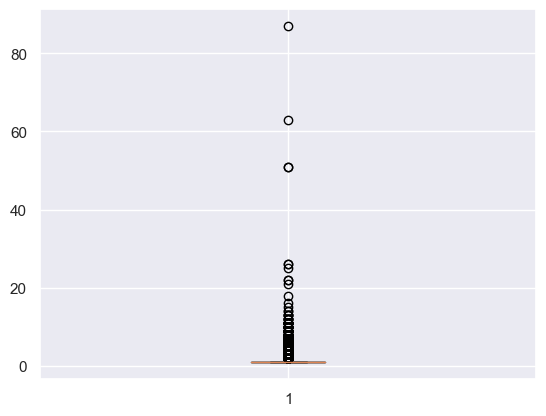

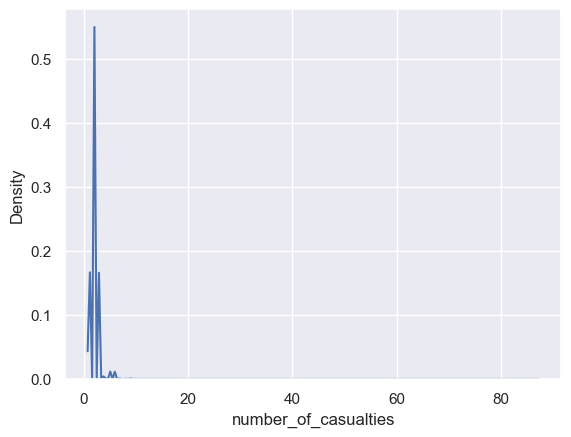

In [308]:
plt.boxplot(df_accidents.number_of_casualties)
plt.show()
sns.kdeplot(df_accidents.number_of_casualties)
plt.show()


In [309]:
df_accidents.number_of_casualties.skew()

15.00083957702496

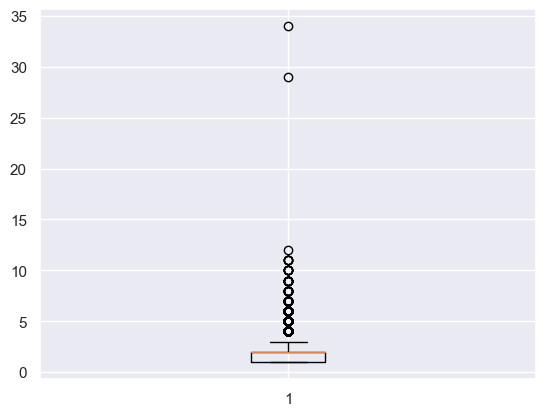

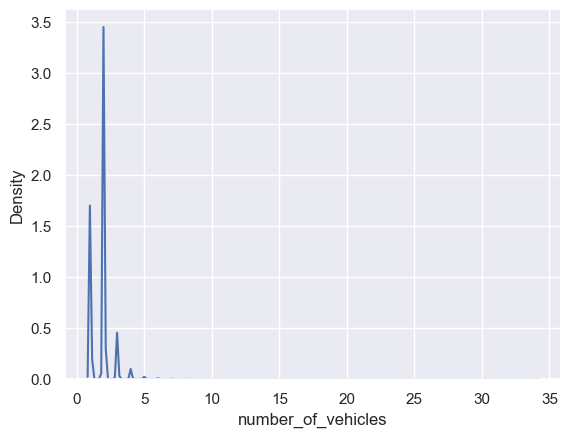

In [310]:
plt.boxplot(df_accidents.number_of_vehicles)
plt.show()
sns.kdeplot(df_accidents.number_of_vehicles)
plt.show()


In [311]:
df_accidents.number_of_vehicles.skew()

2.4062868854505877

In [312]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
X = df_accidents[['number_of_casualties','number_of_vehicles']].values
y_pred = clf.fit_predict(X)


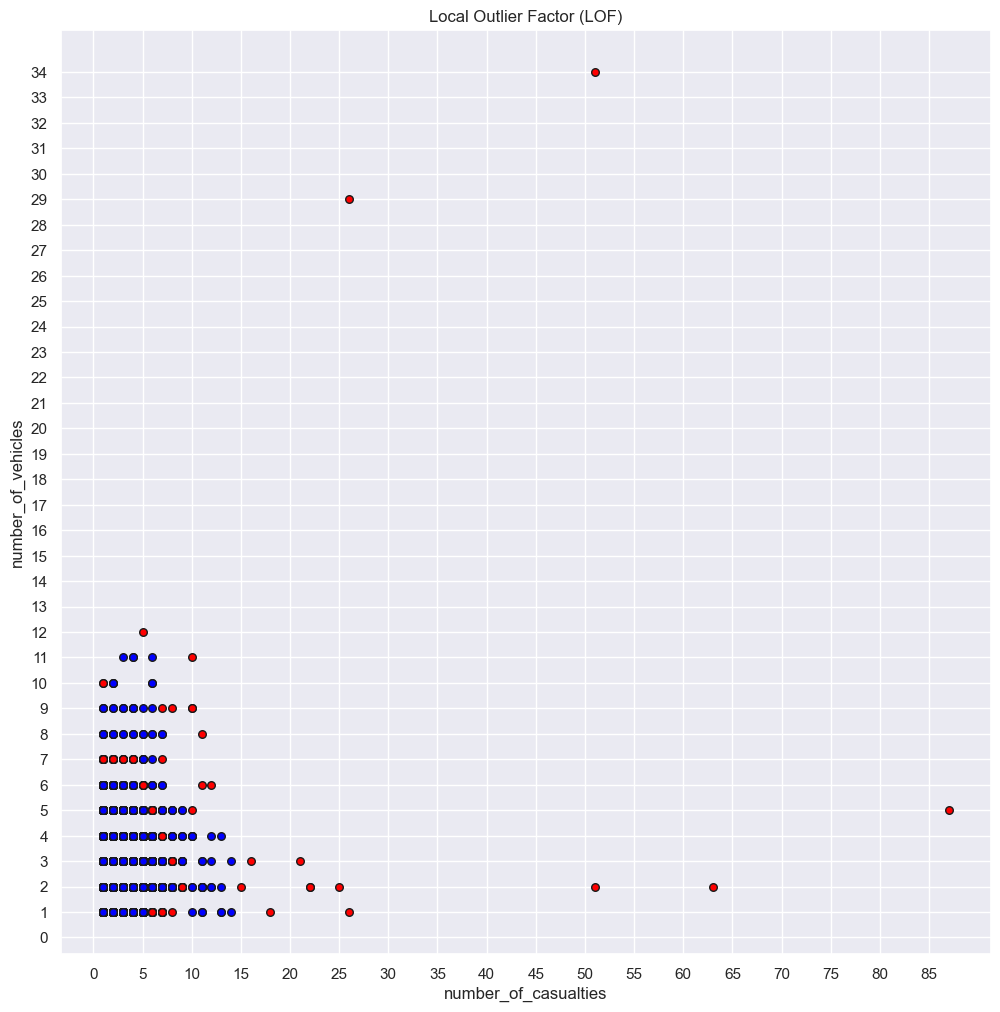

In [313]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('number_of_casualties');
plt.ylabel('number_of_vehicles');
plt.yticks(np.arange(0, 35, 1.0))
plt.xticks(np.arange(0, 90, 5.0))
plt.show()

In [314]:
outliers = list(filter(lambda x: x == True , out_mask))
print(len(outliers))

163


#### A possible method for detecting outlier is LOF (Local Outlier Factor). However, after determining the outliers using the LOF calculation and visualizing the resulting data, it was determined that the LOF method is not suitable for our case as it's reachability calculation unintuitively marks data objects that present themselves as outliers semantically. This could be the result of a multitude of factors, including, multiple points overlapping each other in the space (since both attributes are integers).  

## Handling Missing data

## Handling missing values for second_road_number

### Since missing second road numbers are likely due to the fact that they do not apply, since it is always the case that second road class is -1 for these missing values. Then we can comfortably replace these values with -1  (an indicator for missing)

In [315]:
df_accidents.second_road_number.isnull().mean()*100

39.94084793429896

In [316]:
df_accidents.second_road_number.unique()

array(['first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ',
       nan, '4.0', ..., '7076.0', '6318.0', '708.0'], dtype=object)

In [317]:
df_accidents_complete = df_accidents.copy()
df_accidents_complete['second_road_number'] = df_accidents.second_road_number.fillna(-1)

In [318]:
df_accidents_complete.second_road_number.unique()

array(['first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ',
       -1, '4.0', ..., '7076.0', '6318.0', '708.0'], dtype=object)

In [319]:
df_accidents_complete[df_accidents_complete.second_road_number == -1].second_road_class.unique()

array(['-1'], dtype=object)

In [320]:
df_accidents_complete.second_road_number.isnull().mean()*100

0.0

## Handling missing values for road_type

In [321]:
df_accidents_complete.road_type.unique(),df_accidents_complete.road_type.value_counts(dropna = False)

(array(['Single carriageway', 'Roundabout', 'One way street',
        'Dual carriageway', 'Slip road', nan], dtype=object),
 Single carriageway    114164
 Dual carriageway       21474
 Roundabout             10514
 One way street          3049
 Slip road               1544
 NaN                      729
 Name: road_type, dtype: int64)

In [322]:
f = lambda x: x.mode().values[0] if  len(x.mode().values) > 0 else np.nan
df_accidents_complete['road_type'] = df_accidents_complete['road_type'].fillna(df_accidents_complete.groupby(['first_road_class'])['road_type'].transform(f))

In [323]:
df_accidents_complete.road_type.unique(),df_accidents_complete.road_type.value_counts(dropna = False)

(array(['Single carriageway', 'Roundabout', 'One way street',
        'Dual carriageway', 'Slip road'], dtype=object),
 Single carriageway    114872
 Dual carriageway       21495
 Roundabout             10514
 One way street          3049
 Slip road               1544
 Name: road_type, dtype: int64)

### It was determined to use the stratified mode to impute the missing values for road_type. The decision of using mode imputation was built on multiple factors. First, list-wise deletion of the columns containing missing roads is not an option since the values are not MCAR, but rather MAR. Second, simply replacing by the mode would be a decent method, however, replacing by the startified mode (mode after grouping) would produce even better results. Thus, it was decided to group by the first road class, and then impute with the mode of the resulting groups. The choice of first road class was based on the fact that road_type is most likely correlated to it. For instance, roads of a certain class most likely belong to the same road_type since road class classificaction already gives a notion of the type of road. 

## Handling missing values for the weather_conditions attribute

In [324]:
df_accidents_complete.weather_conditions.unique(),df_accidents_complete.weather_conditions.value_counts(dropna = False)

(array(['Raining no high winds', 'Fine no high winds', 'Other',
        'Fine + high winds', 'Raining + high winds', nan,
        'Snowing no high winds', 'Fog or mist', 'Snowing + high winds'],
       dtype=object),
 Fine no high winds       124780
 Raining no high winds     15813
 Other                      2660
 NaN                        2622
 Fine + high winds          2500
 Raining + high winds       1952
 Fog or mist                 655
 Snowing no high winds       412
 Snowing + high winds         80
 Name: weather_conditions, dtype: int64)

In [325]:
f = lambda x: x.mode().values[0] if  len(x.mode().values) > 0 else np.nan
df_accidents_complete['weather_conditions'] = df_accidents_complete['weather_conditions'].fillna(df_accidents_complete.groupby(['road_surface_conditions'])['weather_conditions'].transform(f))

In [326]:
df_accidents_complete.weather_conditions.value_counts(dropna = False)

Fine no high winds       127396
Raining no high winds     15814
Other                      2660
Fine + high winds          2500
Raining + high winds       1952
Fog or mist                 655
Snowing no high winds       417
Snowing + high winds         80
Name: weather_conditions, dtype: int64

##  It was determined to use the stratified mode to impute the missing values for weather conditions. The decision of using mode imputation was built on multiple factors. First, list-wise deletion of the columns containing missing weather conditions is not an option since the values are not MCAR, but rather MAR. Second, simply replacing by the mode would be a decent method, however, replacing by the startified mode (mode after grouping) would produce even better results. Thus, it was decided to group by the road_surface_conditions, and then impute with the mode of the resulting groups. The choice of road_surface_conditions was based on the fact that weather conditions most likely infleunce the road_surface_conditions in a way where the road_surface_conditions are a result of the general weather conditions. For instance, if its raining then the road surface will most likely be Wet or damp.

## Handling missing values for light_conditions

In [327]:
df_accidents_complete['light_conditions'].replace('Darkness - lighting unknown', np.nan, inplace = True)

In [328]:
df_accidents_complete.light_conditions.unique(),df_accidents_complete.light_conditions.value_counts(dropna = False)

(array(['Darkness - lights lit', 'Daylight', 'Darkness - no lighting', nan,
        'Darkness - lights unlit'], dtype=object),
 Daylight                   112017
 Darkness - lights lit       29131
 Darkness - no lighting       8002
 NaN                          1649
 Darkness - lights unlit       675
 Name: light_conditions, dtype: int64)

In [329]:
df_accidents_daylight_dropped = df_accidents_complete.copy()
df_accidents_daylight_dropped = df_accidents_daylight_dropped[df_accidents_daylight_dropped['light_conditions'] != 'Daylight']
df_accidents_daylight_dropped.light_conditions.value_counts(dropna = False)

Darkness - lights lit      29131
Darkness - no lighting      8002
NaN                         1649
Darkness - lights unlit      675
Name: light_conditions, dtype: int64

In [330]:
df_accidents_light_nandrop = df_accidents_daylight_dropped.dropna()
df_accidents_light_nandrop.light_conditions.value_counts(dropna = False)

Darkness - lights lit      29131
Darkness - no lighting      8002
Darkness - lights unlit      675
Name: light_conditions, dtype: int64

In [331]:
for index,row in df_accidents_complete.iterrows():
    if pd.isnull(row['light_conditions']):
        random_sample = df_accidents_light_nandrop.sample()
        df_accidents_complete.loc[index, 'light_conditions'] = random_sample['light_conditions'][0]

In [332]:
df_accidents_complete.light_conditions.unique(),df_accidents_complete.light_conditions.value_counts(dropna = False)

(array(['Darkness - lights lit', 'Daylight', 'Darkness - no lighting',
        'Darkness - lights unlit'], dtype=object),
 Daylight                   112017
 Darkness - lights lit       30379
 Darkness - no lighting       8373
 Darkness - lights unlit       705
 Name: light_conditions, dtype: int64)

## During the analysis of the missingness of the light condition's values, it became apparent that no single value imputation or startified group imputation would proper semantic meaning. Hence, to maintain the statistical profile of this column's distribution, we decided to impute with values sampled form same column with certain conditions (to keep the semantics of the dataset intact). Namely, we first removed the data points containing with the value daylight, since they semantically have nothing to do with the light condition in darkness. Then from the remaining darkness values, we randomly sampled a value (between lights lit, lights unlit, and no lighting) and imputed the Darkness - lighting unknown values with it. This perserved both the semantic meaning and the statisitical profile.

## Handling missing values for road_surface_conditions

In [333]:
df_accidents_complete['road_surface_conditions'].replace('Data missing or out of range', np.nan, inplace = True)

In [334]:
df_accidents_complete.road_surface_conditions.unique(),df_accidents_complete.road_surface_conditions.value_counts(dropna = False)

(array(['Wet or damp', 'Dry', 'Frost or ice', 'Snow',
        'Flood over 3cm. deep', nan], dtype=object),
 Dry                     110645
 Wet or damp              37547
 Frost or ice              2531
 Snow                       401
 NaN                        222
 Flood over 3cm. deep       128
 Name: road_surface_conditions, dtype: int64)

In [335]:
f = lambda x: x.mode().values[0] if  len(x.mode().values) > 0 else np.nan
df_accidents_complete['road_surface_conditions'] = df_accidents_complete['road_surface_conditions'].fillna(df_accidents_complete.groupby(['weather_conditions'])['road_surface_conditions'].transform(f))

In [336]:
df_accidents_complete.road_surface_conditions.value_counts(dropna = False)

Dry                     110838
Wet or damp              37576
Frost or ice              2531
Snow                       401
Flood over 3cm. deep       128
Name: road_surface_conditions, dtype: int64

##  It was decided to use the stratified mode to impute the missing values for road_surface_conditions. The decision of using mode imputation was built on multiple factors. First, list-wise deletion of the columns containing missing road_surface_conditions is not an option since the values are not MCAR, but rather MAR. Second, simply replacing by the mode would be a decent method, however, replacing by the startified mode (mode after grouping) would produce even better results. Thus, it was decided to group by the weather conditions, and then impute with the mode of the resulting groups. The choice of weather conditions was based on the fact that weather conditions most likely infleunce the road_surface_conditions in a way where the road_surface_conditions are a result of the general weather conditions. For instance, if its raining then the road surface will most likely be Wet or damp.

## Handling missing values for the road_trunk_flag

In [337]:
df_accidents.trunk_road_flag.value_counts()

Non-trunk                                    124124
Data missing or out of range                  16403
Trunk (Roads managed by Highways England)     10947
Name: trunk_road_flag, dtype: int64

In [338]:
df_accidents[df_accidents.trunk_road_flag == 'Data missing or out of range'].speed_limit.value_counts()

30.0    9577
60.0    4315
70.0     937
40.0     851
50.0     526
20.0     197
Name: speed_limit, dtype: int64

In [339]:
df_accidents[df_accidents.trunk_road_flag == 'Non-trunk'].speed_limit.value_counts()

30.0    89062
60.0    16523
40.0    10954
50.0     4110
20.0     1738
70.0     1737
Name: speed_limit, dtype: int64

In [340]:
df_accidents[df_accidents.trunk_road_flag == 'Trunk (Roads managed by Highways England)'].speed_limit.value_counts()

70.0    7674
60.0    1437
50.0     659
40.0     623
30.0     554
Name: speed_limit, dtype: int64

In [341]:
df_accidents[df_accidents.trunk_road_flag == 'Non-trunk'].road_type.value_counts()

Single carriageway    100354
Dual carriageway       11405
Roundabout              8612
One way street          2666
Slip road                595
Name: road_type, dtype: int64

In [342]:
df_accidents[df_accidents.trunk_road_flag == 'Trunk (Roads managed by Highways England)'].road_type.value_counts()

Dual carriageway      7739
Single carriageway    1409
Roundabout             966
Slip road              798
One way street           6
Name: road_type, dtype: int64

### Since road_type and speed limit seem to be good indicators the trunk_road_flag. We can build a logistic regressor to infer whether the missing values for the aformentioned flag are "Non-trunk" or "Trunk (Roads managed by Highways England) ".

In [343]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
clf = LogisticRegression()
df_Xtrain = df_accidents_complete[df_accidents_complete.trunk_road_flag != 'Data missing or out of range']
X_train = df_Xtrain[['speed_limit','road_type']]
encoded_road_type = pd.get_dummies(X_train.road_type, drop_first = True)
mappings = {
        20:0,
        30:1,
        40:2,
        50:3,
        60:4,
        70:5
    }
X_train['speed_limit'] = X_train['speed_limit'].map(mappings)
X_train = X_train.drop('road_type', axis = 1)   
X_train = pd.concat([X_train,encoded_road_type],axis=1)
y_train =  pd.get_dummies(df_Xtrain.trunk_road_flag, drop_first = True)

df_Xtest = df_accidents_complete[df_accidents_complete.trunk_road_flag == 'Data missing or out of range']
X_test = df_Xtest[['speed_limit','road_type']]



X_test = df_Xtest[['speed_limit','road_type']]
encoded_road_type = pd.get_dummies(X_test.road_type, drop_first = True)
X_test['speed_limit'] = X_test['speed_limit'].map(mappings)
X_test = X_test.drop('road_type', axis = 1)   
X_test = pd.concat([X_test,encoded_road_type],axis=1)


X_train = X_train.values.tolist()
y_train = y_train.values.tolist()
clf.fit(X_train,y_train)


#df_imputed = df_accidents_complete.copy()
for index,row in df_accidents_complete.iterrows():
    if(row.trunk_road_flag == 'Data missing or out of range'):
        prediction = clf.predict([X_test.loc[index]])[0]
        df_accidents_complete.loc[index,'trunk_road_flag'] = 'Trunk (Roads managed by Highways England)' if prediction == 0 else 'Non-trunk' 
    
    


In [344]:
df_accidents_complete.trunk_road_flag.value_counts()

Non-trunk                                    125266
Trunk (Roads managed by Highways England)     26208
Name: trunk_road_flag, dtype: int64

In [345]:
df_accidents_complete[df_accidents_complete.trunk_road_flag == 'Non-trunk'].speed_limit.value_counts()

30.0    89062
60.0    16731
40.0    10954
50.0     4110
70.0     2671
20.0     1738
Name: speed_limit, dtype: int64

## Handling missing data for lsoa_of_accident_location attribute

### Since the missing values were determined to not be MNAR, we can safely use imputation methods to fill the missing values in this column. A good method of filling the lsoa locations is through the use of the stratified mode imputation. This will produce acceptable results since lsoa depends on location and thus limiting the mode to groups of related in location will be sufficiently accurate.

In [346]:
df_accidents_complete['lsoa_of_accident_location'] = df_accidents_complete.lsoa_of_accident_location.replace([-1,'-1'], np.nan)
sum(df_accidents_complete['lsoa_of_accident_location'].isnull())


9973

In [347]:
df_imputed = df_accidents_complete.copy()

In [348]:
df_imputed['approximate_latitude'] = pd.qcut(df_imputed['latitude'], q=10, precision=0)
df_imputed['approximate_longitude'] = pd.qcut(df_imputed['longitude'], q=10, precision=0)

In [349]:
df_accidents_complete[df_accidents_complete['lsoa_of_accident_location'].isnull()].local_authority_district.value_counts()

Glasgow City             1280
Edinburgh, City of       1181
North Lanarkshire         569
Aberdeenshire             518
South Lanarkshire         512
Highland                  488
Fife                      448
West Lothian              382
Aberdeen City             360
Renfrewshire              353
Dumfries and Galloway     318
Perth and Kinross         293
Scottish Borders          275
Falkirk                   260
Dundee City               237
Argyll and Bute           230
North Ayrshire            229
Stirling                  220
Angus                     220
South Ayrshire            219
East Ayrshire             204
Midlothian                177
East Lothian              158
Inverclyde                155
West Dunbartonshire       145
East Dunbartonshire       140
Moray                     138
East Renfrewshire         116
Clackmannanshire           65
Western Isles              34
Shetland Islands           32
Orkney Islands             13
Gwynedd                     2
Cornwall  

In [350]:
## a lot of local area authority districts have all their values as -1 for the lsao and hence we cannot impute 
## lsao values with group mode
## this is to check that the mode actually does not work

# df_accidents_complete['lsoa_of_accident_location'] = df_accidents_complete['lsoa_of_accident_location'].fillna(df_accidents_complete.groupby('local_authority_district')['lsoa_of_accident_location'].transform(f))
# df_accidents_complete.lsoa_of_accident_location.value_counts()

### Initially, it was decided to use the local_authority_district to group the objects and then impute using the modes of the individual groups (stratified mode). However, during our analysis, it was discovered that almost all groups having any of their lsoa_of_accident_location as -1 (or missing) infact have all of their lsoa_of_accident_location as -1 (or missing). 
This is already proven analysis that lsoa_of_accident_location is MAR. However, this conclusion renders mode imputation using groups of local_authority_district useless for those groups, as not a single value is available and thus there exists no mode and there exists no value we can impute with. As a result, it was decided to group by another variable that depends on location.

In [351]:
df_accidents_complete.longitude.skew(),df_accidents_complete.latitude.skew()

(-0.4162724971004411, 1.045368009345119)

### After analysing the location variables available, It was decided that a more specific and approximately accurate measure of location needs to be developed for this imputation task. Hence, we have binned the latitide and longitude columns into 10 bins that are equally distributed (they are equally distributed to combat any skewness in the distribution of the location data). After creating these columns, they will be used in a group by statement to group approximately close areas together and impute the missing values but the mode of the close neighbors. This method was chosen since removing the data points (list-wise deletion) was not an option due to the large amount of data that would be removed, and simply imputing using the mode would both be less accurate and would skew the distribution towards the mode. Furthermore, list-wise deletion assumes MCAR, and thus cannot be used.

In [352]:
f = lambda x: x.mode().values[0] if  len(x.mode().values) > 0 else np.nan
df_imputed['lsoa_of_accident_location'] = df_imputed['lsoa_of_accident_location'].fillna(df_imputed.groupby(['approximate_latitude','approximate_longitude'])['lsoa_of_accident_location'].transform(f))

In [353]:
df_imputed.lsoa_of_accident_location.isnull().mean()*100

0.0

In [354]:
sum(df_imputed.lsoa_of_accident_location.isnull())

0

In [355]:
df_imputed[df_imputed['local_authority_district']=='Glasgow City'].lsoa_of_accident_location.value_counts()

E01019116    1280
Name: lsoa_of_accident_location, dtype: int64

In [356]:
df_accidents_complete['lsoa_of_accident_location'] = df_imputed['lsoa_of_accident_location']

## As can be seen with the previous analysis, not only were all the missing values imputed but imputing with the same approximate geo location has allowed geographicallly close areas to be imputed with the same value, which matches the semantic definition of lsao.

## Handling missing values for local_authority_highway

In [357]:
df_accidents_complete['local_authority_highway'].replace('-1', np.nan, inplace = True)
f = lambda x: x.mode().values[0] if  len(x.mode().values) > 0 else np.nan
df_accidents_complete['local_authority_highway'] = df_accidents_complete['local_authority_highway'].fillna(df_accidents_complete.groupby(['police_force'])['local_authority_highway'].transform(f))

In [358]:
df_accidents_complete['local_authority_highway'].isnull().mean()

0.0

## It was determined that using the stratified mode after grouping by police_force is the best option for imputing the local_authority_highway. This was done since the ploice force usually handles similar accidents an operates in a specific region. Thus, imputing by the mode of the groups of police forces makes semantic sense, since we will output the most likely local authority highway for the specific police force we are dealing with.

## Handling duplicates

In [359]:
df_accidents_complete.shape

(151474, 35)

In [360]:
df_accidents_complete.drop_duplicates(set(df_accidents) - set(['accident_reference','accident_index']),inplace=True)

In [361]:
df_accidents_complete.shape

(151469, 35)

### Dropping columns

## For the sake of compactness and dimensionality reduction, we have chosen to remove the accident_year column as it is highly redundant (1 value for the entire dataset). Moreover, this also applies to the accident_reference. On top of that, these columns are not useful for any analysis/machine learning task so we will do away with them. In case that these values are needed later on, they can always be inferred from the accident index column.

In [362]:
df_accidents_complete.drop(labels=['accident_year','accident_reference'], axis=1, inplace=True)

## If reconstructing these two dropped columns becomes of interest. We reccomend this function to separate the index column into two columns

In [363]:
def restore_year_reference(dataframe):
    df = dataframe.copy()
    years = []
    references = []
    for index,row in df.iterrows():
        accident_year = index[:4]
        accident_reference = index[4:]
        years.append(accident_year)
        references.append(accident_reference)
    df['accident_year'] = years
    df['accident_reference'] = references
    return df

### After analyzing the location_easting_osgr & location_northing_osgr attributes and what they represent. We have discovered that the data inside these columns is incomplete an ambigious. Normally, the values for both these attributes start with a prefix that represents a grid section and the following numbers represent the location insidet the grid. Keeping these values in their current state would be misleading as any aggregation that would occur in any following data analysis would aggregate values that have no proximity together and would lead to wrongful statistics. In order to rectify these columns, data integration with other data sources that give context based on location is required. However, for now, we will drop these columns till further notice.


In [364]:
df_accidents_complete.drop(labels=['location_easting_osgr','location_northing_osgr'], axis=1, inplace=True)

In [365]:
df_accidents_complete.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,Slight,1,1,2011-01-13,Thursday,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Crossroads,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812
201101BS70002,-0.165408,51.495710,Metropolitan Police,Serious,2,1,2011-11-01,Tuesday,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819
201101BS70003,-0.170401,51.489763,Metropolitan Police,Slight,1,1,2011-01-19,Wednesday,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,304,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914
201101BS70005,-0.194856,51.497875,Metropolitan Police,Slight,2,3,2011-01-25,Tuesday,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,first_road_class is C or Unclassified. These r...,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813
201101BS70007,-0.182783,51.482671,Metropolitan Police,Slight,2,1,2011-06-01,Thursday,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913


## Findings and conclusions

#### In the cases were we used the stratified mode to impute, it was observed that there was enough information in the chosen groups to impute the missing values. That is, the columns chosen to group by were chosen in a careful and accurate manner. This was done such that the grouping semantically makes sense and the groups are not completely empty (not all missing values, so that we have a mode to impute with).

#### In the light_condition imputation, we decided to impute by the distribution in the manner discussed above. After the imputation was done, it was observed that the distribution of the darkness light conditions was indeed preserved. This suggests that the method of imputation used was indeed behaving in the manner intended, and that the statistical profile of the light_condition attribute was maintained.

#### After dropping the accident year and accident reference columns, it was observed that the reconstruction method we suggested does accurately reconstruct the columns. Thus, we can conclude that these columns can indeed be recontructed simply from the index.

#### After dropping the datapoints identified as duplicates, the number of objects in the dataset was reobserved. This was done in order to double check that we dropped all duplicates and only duplicates. That is, we guaranteed that exactly one of each data point is kept, and any duplicate is deleted. 

## Handling outliers

In [366]:
zcas = np.abs(stats.zscore(df_accidents_complete.number_of_casualties))


## `` This method takes in the zscores of a column and returns (100-threshold)th percentile in the form of a boolean array.``

In [367]:
def getOptimalzCutOff(zScores,threshold):
    for i in range(1,10):
        filtered_entries = zScores < i
        percentage_dropped =100 - ((sum(filtered_entries)/len(filtered_entries))*100)
        if(percentage_dropped <= threshold):
            return filtered_entries

In [368]:
filtered_entries_cas = getOptimalzCutOff(zcas,1)

In [369]:
df_cleaned_filtered_outliers = df_accidents_complete[filtered_entries_cas]


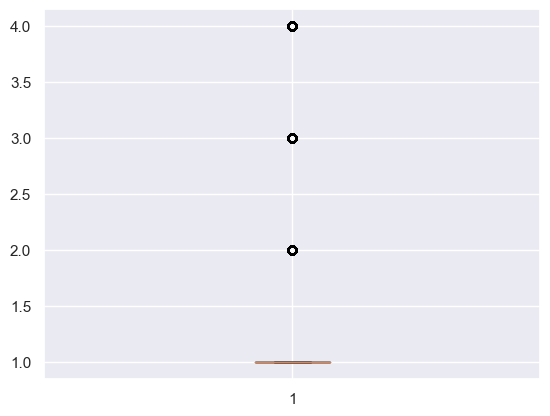

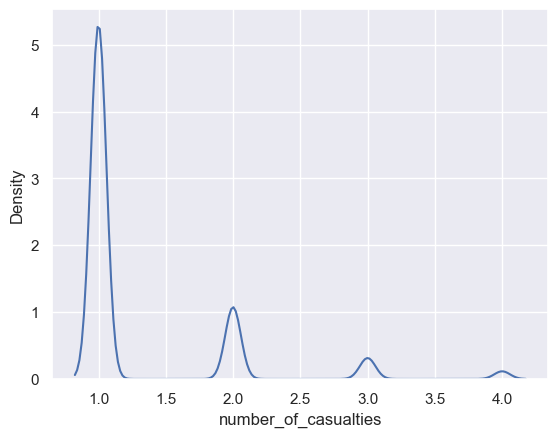

In [370]:
plt.boxplot(df_cleaned_filtered_outliers.number_of_casualties)
plt.show()
sns.kdeplot(df_cleaned_filtered_outliers.number_of_casualties)
plt.show()


In [371]:
df_accidents_complete.shape,df_cleaned_filtered_outliers.shape

((151469, 31), (149975, 31))

In [372]:
df_outliers_cas = df_accidents_complete[zcas >= 5]
df_outliers_cas.number_of_casualties.value_counts()

6     350
7     123
8      49
9      23
11     14
10     11
12      5
13      4
22      2
51      2
26      2
14      2
25      1
21      1
16      1
18      1
63      1
87      1
15      1
Name: number_of_casualties, dtype: int64

In [373]:
zcar = np.abs(stats.zscore(df_cleaned_filtered_outliers.number_of_vehicles))

In [374]:
filtered_entries_car = getOptimalzCutOff(zcar,1)

In [375]:
df_outliers_car = df_cleaned_filtered_outliers[zcar >= 3]


In [376]:
df_cleaned_filtered_outliers = df_cleaned_filtered_outliers[filtered_entries_car]


In [377]:
df_outliers_car.number_of_vehicles.value_counts()

4     2342
5      477
6      152
7       44
8       17
9       12
10       5
11       3
Name: number_of_vehicles, dtype: int64

In [378]:
df_outliers = pd.concat([df_outliers_cas,df_outliers_car],axis = 0)
df_outliers.shape

(3646, 31)

In [379]:
df_accidents_complete.shape,df_cleaned_filtered_outliers.shape

((151469, 31), (149265, 31))

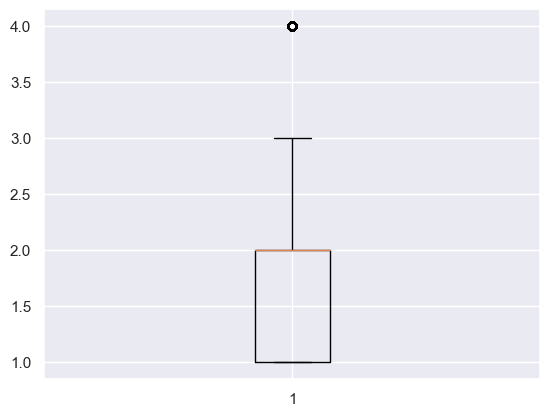

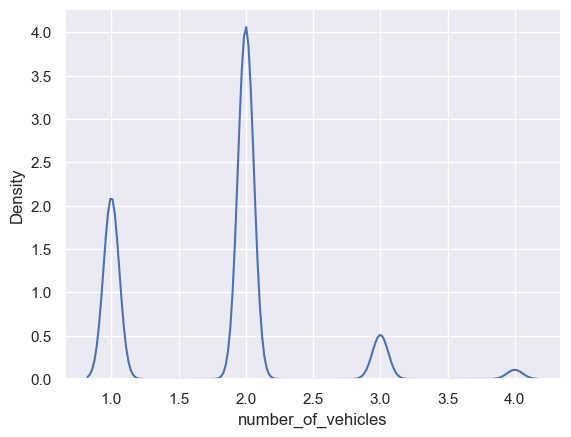

In [380]:
plt.boxplot(df_cleaned_filtered_outliers.number_of_vehicles)
plt.show()
sns.kdeplot(df_cleaned_filtered_outliers.number_of_vehicles)
plt.show()


In [381]:
df_cleaned_filtered_outliers.isnull().mean()*100

longitude                                      0.0
latitude                                       0.0
police_force                                   0.0
accident_severity                              0.0
number_of_vehicles                             0.0
number_of_casualties                           0.0
date                                           0.0
day_of_week                                    0.0
time                                           0.0
local_authority_district                       0.0
local_authority_ons_district                   0.0
local_authority_highway                        0.0
first_road_class                               0.0
first_road_number                              0.0
road_type                                      0.0
speed_limit                                    0.0
junction_detail                                0.0
junction_control                               0.0
second_road_class                              0.0
second_road_number             

## Findings and conclusions

# 4 - Data transformation

## 4.1 - Discretization

### According to the ISO standard when it comes to dates, specifically the ISO 8601, if the 1st day of the year is on a Friday, Saturday, or Sunday, it is assigned week 52 or week 53 of the previous year. The ISO week numbering starts with 1 at the first Monday of the year. Since our dataset is only concerned with a specific year, it was decided to assign those dates 0 rather than 52 or 53. This will allow us to abide as much as possible by the ISO standard without introducing the confusion of having another year in a dataset with only one year.

In [382]:
 import datetime
# df_cleaned_filtered_outliers['Week number'] = df_cleaned_filtered_outliers['date'].dt.isocalendar().week
df_cleaned_filtered_outliers['Week number'] = df_cleaned_filtered_outliers['date'].dt.strftime("%U").astype(int)
df_cleaned_filtered_outliers['date'] = df_cleaned_filtered_outliers['date'].dt.date

In [383]:
df_cleaned_filtered_outliers['Week number'].value_counts()

50    3548
37    3363
39    3360
24    3285
28    3263
6     3187
41    3070
23    3057
32    3036
2     3034
3     3024
42    3020
43    3018
14    3012
26    3006
19    2996
40    2989
31    2972
38    2958
10    2947
46    2941
47    2934
1     2929
27    2925
29    2911
36    2899
44    2884
25    2882
16    2881
49    2876
21    2875
34    2843
48    2835
13    2822
7     2805
30    2778
12    2777
15    2774
45    2729
20    2717
51    2715
11    2705
35    2674
33    2644
17    2607
18    2577
9     2544
4     2518
8     2476
22    2445
5     2384
52    1613
0      201
Name: Week number, dtype: int64

In [384]:
df_cleaned_filtered_outliers.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,Slight,1,1,2011-01-13,Thursday,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Crossroads,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812,2
201101BS70002,-0.165408,51.495710,Metropolitan Police,Serious,2,1,2011-11-01,Tuesday,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819,44
201101BS70003,-0.170401,51.489763,Metropolitan Police,Slight,1,1,2011-01-19,Wednesday,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,304,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914,3
201101BS70005,-0.194856,51.497875,Metropolitan Police,Slight,2,3,2011-01-25,Tuesday,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,first_road_class is C or Unclassified. These r...,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813,4
201101BS70007,-0.182783,51.482671,Metropolitan Police,Slight,2,1,2011-06-01,Thursday,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913,22


In [385]:
Values = []
Encodings =[]
df_cleaned_filtered_outliers['Week number'] =df_cleaned_filtered_outliers['Week number'].astype(int)
num_weeks = df_cleaned_filtered_outliers['Week number'].max()
for weeknumber in range(0,num_weeks+1):
    dates = df_cleaned_filtered_outliers[df_cleaned_filtered_outliers['Week number']== weeknumber].date.unique()
    if(len(dates)!=0):
        dates.sort()
        Values.append(str(dates[0]) + ' - ' +str(dates[len(dates)-1]))
        Encodings.append(weeknumber)
look_up = {
    'column_name': 'Week num',
    'Value': Values,
    'Encoding': Encodings
    
}



In [386]:
look_up_table = pd.DataFrame()
look_up_table = pd.concat([look_up_table,pd.DataFrame(look_up)])


## 4.11 - Findings and conclusions

## By leveraging the power of pandas series, we were able to quikcly extract a new series that represents the week number using isocalendar and the datetime library

### After conducting discretization on the date variable, a new column was added to the dataset. This column ranges from 0 to 52 and would help us quickly determine which week of the year the data point belongs to.

## 4.2 - Encoding

In [387]:
def OneHotEncode(dataframe,column_name,column_to_drop = None,drop_first = False):
    df = dataframe.copy()
    if(drop_first):
        encoded = pd.get_dummies(df[column_name],prefix = column_name,drop_first = drop_first)
    else:
        encoded = pd.get_dummies(df[column_name],prefix = column_name)
    if(column_to_drop != None):
        encoded.drop(str(column_name)+'_'+column_to_drop, axis = 1, inplace=True)
    df.drop(column_name,axis =1, inplace = True)
    df = pd.concat([df,encoded],axis = 1)
    
    
    
    
    return df;

In [388]:
def LabelEncode(dataframe,column_name,mapping={}):
    le_namemapping ={}
    look_up = {}
    df = dataframe.copy()
    if(len(mapping)!=0):
        df[column_name] = df[column_name].map(mapping)
        look_up = {
            'column_name': column_name,
            'Value': mapping.keys(),
            'Encoding': mapping.values()
        }
    else:
        le = preprocessing.LabelEncoder()
        le.fit(df[column_name])
        
        le_namemapping = dict(zip(le.classes_, le.transform(le.classes_)))
        look_up = {
            'column_name': column_name,
            'Value': le.classes_ ,
            'Encoding': le.transform(le.classes_)
        }
        df[column_name] = df[column_name].map(le_namemapping)
    look_up = pd.DataFrame(look_up)
    return df,look_up   
        

In [389]:
df_cleaned_filtered_outliers.columns

Index(['longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'Week number'],
      dtype='object')

## ``Encoding the accident_severity attribute``
### Since accident severity is ordinal, we can safely use label encoding

In [390]:
df_cleaned_filtered_outliers_encoded = df_cleaned_filtered_outliers.copy()

In [391]:
df_cleaned_filtered_outliers_encoded['accident_severity'].value_counts()

Slight     127056
Serious     20514
Fatal        1695
Name: accident_severity, dtype: int64

In [392]:
mappings = {
        'Slight':1,
        'Serious':2,
        'Fatal':3
    }

df_cleaned_filtered_outliers_encoded,mappings = LabelEncode(df_cleaned_filtered_outliers_encoded,'accident_severity',mappings)
df_cleaned_filtered_outliers_encoded['accident_severity'].value_counts()

1    127056
2     20514
3      1695
Name: accident_severity, dtype: int64

In [393]:
look_up_table = pd.concat([look_up_table,mappings],axis = 0)

## ``Encoding first road class``
### Since there is no inherent order between road classes and since the cardinality of the road class column is quite low, we can safely use one hot encoding. We can also drop the last column to decrease the dimensionality of the output dataset since the last column can be easily inferred  from the abscense of all other classifications. In this case we will drop the column that encodes the value "unclassified" as it makes the most semantic meaning.

In [394]:
df_cleaned_filtered_outliers_encoded = OneHotEncode(df_cleaned_filtered_outliers_encoded,'first_road_class','Unclassified')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,Thursday,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Crossroads,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812,2,0,0,0,1,0
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,Tuesday,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819,44,0,0,0,1,0
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,Wednesday,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914,3,0,0,1,0,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,Tuesday,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813,4,0,0,0,0,0
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,Thursday,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,One way street,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913,22,1,0,0,0,0


In [395]:
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,Thursday,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Crossroads,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812,2,0,0,0,1,0
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,Tuesday,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819,44,0,0,0,1,0
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,Wednesday,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914,3,0,0,1,0,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,Tuesday,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813,4,0,0,0,0,0
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,Thursday,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,One way street,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913,22,1,0,0,0,0


## ``Encoding second road class``
### Since there is no inherent order between road classes and since the cardinality of the road class column is quite low, we can safely use one hot encoding. We can also drop the last column to decrease the dimensionality of the output dataset since the last column can be easily inferred from the abscense of all other classifications. In this case, we will drop the column that encodes the value "-1" which means that the value is missing as this makes the most semantic meaning..

In [396]:
df_cleaned_filtered_outliers_encoded = OneHotEncode(df_cleaned_filtered_outliers_encoded,'second_road_class','-1')
df_cleaned_filtered_outliers_encoded.head()


,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,Thursday,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Crossroads,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812,2,0,0,0,1,0,0,0,0,0,0,1
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,Tuesday,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819,44,0,0,0,1,0,0,0,0,0,0,1
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,Wednesday,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914,3,0,0,1,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,Tuesday,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813,4,0,0,0,0,0,0,0,0,0,0,1
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,Thursday,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,One way street,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913,22,1,0,0,0,0,0,0,0,0,0,0


## `` Encoding the trunk_road_flag``
### Since trunk road flag is a binary attribute, we will choose binary encoding.

In [397]:
df_cleaned_filtered_outliers_encoded.trunk_road_flag.unique()

array(['Non-trunk', 'Trunk (Roads managed by Highways England)'],
      dtype=object)

In [398]:
mappings = {
        'Non-trunk':0,
        'Trunk (Roads managed by Highways England)':1,
    }
df_cleaned_filtered_outliers_encoded,mappings = LabelEncode(df_cleaned_filtered_outliers_encoded,'trunk_road_flag',mappings)
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,Thursday,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Crossroads,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,Tuesday,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,Wednesday,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,Tuesday,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,0,E01002813,4,0,0,0,0,0,0,0,0,0,0,1
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,Thursday,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,One way street,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,0,E01002913,22,1,0,0,0,0,0,0,0,0,0,0


In [399]:
look_up_table = pd.concat([look_up_table,mappings],axis = 0)

## `` Encoding  did_police_officer_attend_scene_of_accident``
### Since did_police_officer_attend_scene_of_accident is a binary attribute, we will choose binary encoding.

In [400]:
df_cleaned_filtered_outliers_encoded.did_police_officer_attend_scene_of_accident.unique()

array(['Yes', 'No'], dtype=object)

In [401]:
mappings = {
        'No':0,
        'Yes':1,
    }
df_cleaned_filtered_outliers_encoded,mappings = LabelEncode(df_cleaned_filtered_outliers_encoded,'did_police_officer_attend_scene_of_accident',mappings)
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,Thursday,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Crossroads,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,Tuesday,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,Wednesday,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,Tuesday,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,1,0,E01002813,4,0,0,0,0,0,0,0,0,0,0,1
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,Thursday,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,One way street,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,0,0,E01002913,22,1,0,0,0,0,0,0,0,0,0,0


In [402]:
look_up_table = pd.concat([look_up_table,mappings],axis = 0)

## ``Encoding Day of the week``
### If we use Label encoding here, each day of the week would be assigned a numeric label from 1-7, and because of this, any model will consequently identify relationships such as Sunday(6) > Saturday(5). Some models, for example, a linear regressor, will assume that Sunday (6) is bigger (or carries more weight) than all other days in the week. This is misleading. For now, this assumption does not make much sense and the sense of the ordinality can be ignored since we have more meaningful relationships between their values that can be inferred without label encoding. since the cardinality of the road class column is quite low, we can safely use one hot encoding. We can also drop the last column to decrease the dimensionality of the output dataset since the last column can be easily inferred from the rest. Here, it is the case that no column can be favored for dropping as they all give the same semantic meaning.


In [403]:
df_cleaned_filtered_outliers_encoded = OneHotEncode(df_cleaned_filtered_outliers_encoded,'day_of_week',drop_first=True)
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Crossroads,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,1,0,E01002813,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,One way street,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,0,0,E01002913,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## `` Encoding urban_or_rural_area``
### Since urban_or_rural_area is a binary attribute, we will choose binary encoding. We will also change the column name to serve as an indicator attribute for urban

In [404]:
df_cleaned_filtered_outliers_encoded.urban_or_rural_area.value_counts()

Urban    98313
Rural    50952
Name: urban_or_rural_area, dtype: int64

In [405]:
mappings = {
        'Rural':0,
        'Urban':1,
    }
df_cleaned_filtered_outliers_encoded,mappings = LabelEncode(df_cleaned_filtered_outliers_encoded,'urban_or_rural_area',mappings)
df_cleaned_filtered_outliers_encoded.rename(columns = {'urban_or_rural_area':'is_Urban'}, inplace = True)
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Crossroads,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,1,1,0,E01002813,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,One way street,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,1,0,0,E01002913,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [406]:
look_up_table = pd.concat([look_up_table,mappings],axis = 0)

## ``Encoding road_surface_conditions``
### We will encode road_surface_conditions using one-hot encoding. It was decided to use this method since the values of the road_surface_conditions have no inherent order to them. Thus, using label encoding would be misleading since it will introduce order. Furthermore, the caridnality of the attribute is relatively low, so using one-hot encoding will not excessively increase dimensionality. Finally, we dropped one of the columns to decrease the dimensionality of the output dataset since the last column can be easily inferred from the rest. In this case, we will favor dropping the column that represents a dry road surface as it is considered as the base case (no rain or snow or floods). Hence, it can be easily inferred from the absence of the aformentioned weather phenomenon.


In [407]:
df_cleaned_filtered_outliers_encoded = OneHotEncode(df_cleaned_filtered_outliers_encoded,'road_surface_conditions',drop_first=True)
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,special_conditions_at_site,carriageway_hazards,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Crossroads,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,None,None,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,None,None,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,None,None,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,None,None,1,1,0,E01002813,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,One way street,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,None,None,1,0,0,E01002913,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## ``Encoding road_type``
### We will encode road_type using one-hot encoding. It was decided to use this method since the values of the road_type have no inherent order to them. Thus, using label encoding would be misleading since it will introduce order. Furthermore, the caridnality of the attribute is relatively low, so using one-hot encoding will not excessively increase dimensionality. Finally, we dropped one of the columns to decrease the dimensionality of the output dataset since the last column can be easily inferred from the rest. There is no column here that could be favored to drop so we will intuitively dropped the first column.


In [408]:
df_cleaned_filtered_outliers_encoded = OneHotEncode(df_cleaned_filtered_outliers_encoded,'road_type',drop_first=True)
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,junction_detail,junction_control,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,special_conditions_at_site,carriageway_hazards,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,Crossroads,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,None,None,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,T or staggered junction,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,None,None,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,None,None,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,Mini-roundabout,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,None,None,1,1,0,E01002813,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,None,None,1,0,0,E01002913,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


## ``Encoding light_conditions``
### We will encode light_conditions using one-hot encoding. It was decided to use this method since the values of the light_conditions have no inherent order to them. Thus, using label encoding would be misleading since it will introduce order. Furthermore, the caridnality of the attribute is relatively low, so using one-hot encoding will not excessively increase dimensionality. Finally, we dropped one of the columns to decrease the dimensionality of the output dataset since the last column can be easily inferred from the rest. Here, it is another case of dropping the column that represents a base case value. Daylight here can be easily inferred from the lack or absence of the several darkness columns.


In [409]:
df_cleaned_filtered_outliers_encoded = OneHotEncode(df_cleaned_filtered_outliers_encoded,'light_conditions',column_to_drop='Daylight')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,junction_detail,junction_control,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,weather_conditions,special_conditions_at_site,carriageway_hazards,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,Crossroads,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Raining no high winds,None,None,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,T or staggered junction,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Fine no high winds,None,None,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Fine no high winds,None,None,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,Mini-roundabout,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Fine no high winds,None,None,1,1,0,E01002813,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Fine no high winds,None,None,1,0,0,E01002913,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0


## ``Encoding weather_conditions``
### We will encode weather_conditions using one-hot encoding. It was decided to use this method since the values of the weather_conditions have no inherent order to them. Thus, using label encoding would be misleading since it will introduce order. Furthermore, the caridnality of the attribute is relatively low, so using one-hot encoding will not excessively increase dimensionality. Finally, we dropped one of the columns to decrease the dimensionality of the output dataset since the last column can be easily inferred from the rest. A decision here was made to drop the other column as it is very easy to interpret the other category from the absence of the rest of the categories.


In [410]:
df_cleaned_filtered_outliers_encoded = OneHotEncode(df_cleaned_filtered_outliers_encoded,'weather_conditions',column_to_drop="Other")
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,junction_detail,junction_control,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,special_conditions_at_site,carriageway_hazards,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,Crossroads,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,T or staggered junction,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,Mini-roundabout,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002813,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,0,0,E01002913,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0


## ``Encoding junction_detail``
### We will encode junction_detail using one-hot encoding. It was decided to use this method since the values of the junction_detail have no inherent order to them. Thus, using label encoding would be misleading since it will introduce order. Furthermore, the caridnality of the attribute is relatively low, so using one-hot encoding will not excessively increase dimensionality. Finally, we dropped one of the columns to decrease the dimensionality of the output dataset since the last column can be easily inferred from the rest. A decision here was made to drop the other column as it is very easy to interpret the other category from the absence of the rest of the categories.


In [411]:
df_cleaned_filtered_outliers_encoded = OneHotEncode(df_cleaned_filtered_outliers_encoded,'junction_detail',column_to_drop='Other junction')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,junction_control,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,special_conditions_at_site,carriageway_hazards,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,30.0,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,Give way or uncontrolled,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002813,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,30.0,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,0,0,E01002913,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


## ``Encoding junction_control``
### We will encode junction_control using one-hot encoding. It was decided to use this method since the values of the junction_control have no inherent order to them. Thus, using label encoding would be misleading since it will introduce order. Furthermore, the caridnality of the attribute is relatively low, so using one-hot encoding will not excessively increase dimensionality. Finally, we dropped one of the columns to decrease the dimensionality of the output dataset since the last column can be easily inferred from the rest. A decision here was made to drop the 'Data missing or out of range' column as it is very easy to interpret the other category from the absence of the rest of the categories. 


In [412]:
df_cleaned_filtered_outliers_encoded = OneHotEncode(df_cleaned_filtered_outliers_encoded,'junction_control',column_to_drop='Data missing or out of range')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,special_conditions_at_site,carriageway_hazards,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,30.0,-1,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002813,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,30.0,-1,None within 50 metres,No physical crossing facilities within 50 metres,None,None,1,0,0,E01002913,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0

## ``Encoding pedestrian_crossing_human_control``
### We will encode pedestrian_crossing_human_control using one-hot encoding. It was decided to use this method since the values of the pedestrian_crossing_human_control have no inherent order to them. Thus, using label encoding would be misleading since it will introduce order. Furthermore, the caridnality of the attribute is relatively low, so using one-hot encoding will not excessively increase dimensionality. Finally, we dropped one of the columns to decrease the dimensionality of the output dataset since the last column can be easily inferred from the rest. A decision here was made to drop the 'None within 50 metres' column as it is very easy to interpret the other category from the absence of the rest of the categories. 


In [413]:
df_cleaned_filtered_outliers_encoded = OneHotEncode(df_cleaned_filtered_outliers_encoded,'pedestrian_crossing_human_control',column_to_drop='None within 50 metres ')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,pedestrian_crossing_physical_facilities,special_conditions_at_site,carriageway_hazards,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,30.0,-1,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,No physical crossing facilities within 50 metres,None,None,1,1,0,E01002813,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,3220,30.0,-1,No physical crossing facilities within 50 metres,None,None,1,0,0,E01002913,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0

## ``Encoding pedestrian_crossing_physical_facilities``
### We will encode pedestrian_crossing_physical_facilities using one-hot encoding. It was decided to use this method since the values of the pedestrian_crossing_physical_facilities have no inherent order to them. Thus, using label encoding would be misleading since it will introduce order. Furthermore, the caridnality of the attribute is relatively low, so using one-hot encoding will not excessively increase dimensionality. Finally, we dropped one of the columns to decrease the dimensionality of the output dataset since the last column can be easily inferred from the rest. A decision here was made to drop the 'No physical crossing facilities within 50 metres' column as it is very easy to interpret the other category from the absence of the rest of the categories. 


In [414]:
df_cleaned_filtered_outliers_encoded = OneHotEncode(df_cleaned_filtered_outliers_encoded,'pedestrian_crossing_physical_facilities',column_to_drop='No physical crossing facilities within 50 metres')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,special_conditions_at_site,carriageway_hazards,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,None,None,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,None,None,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,30.0,-1,None,None,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,None,None,1,1,0,E01002813,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
201101BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,06:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and 

## ``Encoding special_conditions_at_site``
### We will encode special_conditions_at_site using one-hot encoding. It was decided to use this method since the values of the special_conditions_at_site have no inherent order to them. Thus, using label encoding would be misleading since it will introduce order. Furthermore, the caridnality of the attribute is relatively low, so using one-hot encoding will not excessively increase dimensionality. Finally, we dropped one of the columns to decrease the dimensionality of the output dataset since the last column can be easily inferred from the rest. A decision here was made to drop the 'None' column as it is very easy to interpret the other category from the absence of the rest of the categories. 


In [415]:
df_cleaned_filtered_outliers_encoded = OneHotEncode(df_cleaned_filtered_outliers_encoded,'special_conditions_at_site',column_to_drop='None')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,carriageway_hazards,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,None,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,None,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,30.0,-1,None,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,23:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified

## ``Encoding carriageway_hazards``
### We will encode carriageway_hazards using one-hot encoding. It was decided to use this method since the values of the carriageway_hazards have no inherent order to them. Thus, using label encoding would be misleading since it will introduce order. Furthermore, the caridnality of the attribute is relatively low, so using one-hot encoding will not excessively increase dimensionality. Finally, we dropped one of the columns to decrease the dimensionality of the output dataset since the last column can be easily inferred from the rest. A decision here was made to drop the 'None' column as it is very easy to interpret the other category from the absence of the rest of the categories. 



In [416]:
df_cleaned_filtered_outliers_encoded = OneHotEncode(df_cleaned_filtered_outliers_encoded,'carriageway_hazards',column_to_drop='None')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,30.0,-1,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,

## ``Encoding police_force``
### Since there is no inherent order to the police force column, one-hot encoding would generally be preferred. However, given the massive cardinality of this column and the fact that that all the values appear with significant frequencies in the dataset, we cannot reccommend the use of one-hot encoding or one-hot encoding of frequent categories. Thus, although it is not  completely optimal, we will opt to label encode this column.

In [417]:
df_cleaned_filtered_outliers_encoded,mappings = LabelEncode(df_cleaned_filtered_outliers_encoded,'police_force')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,29,1,1,1,2011-01-13,16:54,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70002,-0.165408,51.495710,29,2,2,1,2011-11-01,19:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70003,-0.170401,51.489763,29,1,1,1,2011-01-19,17:30,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,304,30.0,-1,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [418]:
look_up_table = pd.concat([look_up_table,mappings],axis = 0)

## ``Encoding local_authority_district``
### Since there is no inherent order to the local_authority_district column, one-hot encoding would generally be preferred. However, given the massive cardinality of this column and the fact that that all the values appear with significant frequencies in the dataset, we cannot reccommend the use of one-hot encoding or one-hot encoding of frequent categories. Thus, although it is not  completely optimal, we will opt to label encode this column.

In [419]:
df_cleaned_filtered_outliers_encoded,mappings = LabelEncode(df_cleaned_filtered_outliers_encoded,'local_authority_district')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,29,1,1,1,2011-01-13,16:54,166,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70002,-0.165408,51.495710,29,2,2,1,2011-11-01,19:45,166,Kensington and Chelsea,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70003,-0.170401,51.489763,29,1,1,1,2011-01-19,17:30,166,Kensington and Chelsea,Kensington and Chelsea,304,30.0,-1,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,29,1,2,3,2

In [420]:
mappings

,column_name,Value,Encoding
0,local_authority_district,Aberdeen City,0
1,local_authority_district,Aberdeenshire,1
2,local_authority_district,Adur,2
3,local_authority_district,Allerdale,3
4,local_authority_district,Amber Valley,4
...,...,...,...
375,local_authority_district,Wychavon,375
376,local_authority_district,Wycombe,376
377,local_authority_district,Wyre,377
378,local_authority_district,Wyre Forest,378


## ``Encoding local_authority_ons_district``
### Since there is no inherent order to the local_authority_ons_district column, one-hot encoding would generally be preferred. However, given the massive cardinality of this column and the fact that that all the values appear with significant frequencies in the dataset, we cannot reccommend the use of one-hot encoding or one-hot encoding of frequent categories. Thus, although it is not  completely optimal, we will opt to label encode this column.

In [421]:
df_cleaned_filtered_outliers_encoded,mappings = LabelEncode(df_cleaned_filtered_outliers_encoded,'local_authority_ons_district')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,29,1,1,1,2011-01-13,16:54,166,168,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70002,-0.165408,51.495710,29,2,2,1,2011-11-01,19:45,166,168,Kensington and Chelsea,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70003,-0.170401,51.489763,29,1,1,1,2011-01-19,17:30,166,168,Kensington and Chelsea,304,30.0,-1,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,29,1,2,3,2011-01-25,23:40,166,168,Kensington and Chelsea,first_road

In [422]:
look_up_table = pd.concat([look_up_table,mappings],axis = 0)

## ``Encoding local_authority_highway``
### Since there is no inherent order to the local_authority_highway column, one-hot encoding would generally be preferred. However, given the massive cardinality of this column and the fact that that all the values appear with significant frequencies in the dataset, we cannot reccommend the use of one-hot encoding or one-hot encoding of frequent categories. Thus, although it is not  completely optimal, we will opt to label encode this column.

In [423]:
df_cleaned_filtered_outliers_encoded,mappings = LabelEncode(df_cleaned_filtered_outliers_encoded,'local_authority_highway')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,29,1,1,1,2011-01-13,16:54,166,168,89,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70002,-0.165408,51.495710,29,2,2,1,2011-11-01,19:45,166,168,89,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassified. These r...,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70003,-0.170401,51.489763,29,1,1,1,2011-01-19,17:30,166,168,89,304,30.0,-1,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,29,1,2,3,2011-01-25,23:40,166,168,89,first_road_class is C or Unclassified. These r...,30.0,first_road_class is C or Unclassifi

In [424]:
look_up_table = pd.concat([look_up_table,mappings],axis = 0)

## ``Encoding first_road_number and second road number``

### It was already stated that unclassifed or roads classified as C should have a value of zero. Accordingly, we have chosen to replace these values by the integer value of 0 and not proceed with any forms of encoding as one hot encoding is not an option due to high cardinality and label encoding will only change the semantically meaningful number into ones with no meaning without adding any value.

In [425]:
len(df_cleaned_filtered_outliers_encoded.first_road_number.unique())

3294

In [426]:
df_cleaned_filtered_outliers_encoded = df_cleaned_filtered_outliers_encoded.replace('first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ',0)
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,29,1,1,1,2011-01-13,16:54,166,168,89,0,30.0,0,1,1,0,E01002812,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70002,-0.165408,51.495710,29,2,2,1,2011-11-01,19:45,166,168,89,0,30.0,0,1,1,0,E01002819,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70003,-0.170401,51.489763,29,1,1,1,2011-01-19,17:30,166,168,89,304,30.0,-1,1,1,0,E01002914,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,29,1,2,3,2011-01-25,23:40,166,168,89,0,30.0,0,1,1,0,E01002813,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70007,-0.182783,51.482671,29,1,2,1,2011-06-01,06:20,166,168,89,3220,30.0,-1,1,0,0,E01002913,22,1,0,0,0,0,0,0,0,0,0,

## Since the columns first and second road numbers now only contain integer values, we will convert their type to integers to optimize storage and other operations

In [427]:
df_cleaned_filtered_outliers_encoded['first_road_number'] = df_cleaned_filtered_outliers_encoded.first_road_number.astype(float)
df_cleaned_filtered_outliers_encoded['second_road_number'] = df_cleaned_filtered_outliers_encoded.second_road_number.astype(float)

## Since there are floating point numbers such as 4.0, we first had to convert everything to float to unify them and then convert it to int.

In [428]:
df_cleaned_filtered_outliers_encoded['first_road_number'] = df_cleaned_filtered_outliers_encoded.first_road_number.astype(int)
df_cleaned_filtered_outliers_encoded['second_road_number'] = df_cleaned_filtered_outliers_encoded.second_road_number.astype(int)

## ``Encoding lsoa_of_accident_location``
### The lsoa_of_accident_location represents areas. LSOAs in England and Whales divide the map into regions with approximately similar populations. Since knowing which LSOA the accident happened in might be important for the later analysis done on the dataset, it was decided to keep this column. However, it cannot be kept as is and needs to be somehow encoded given its alphanumeric nature. 

#### For this task, it was decided to use label encoding. This decision was based on the fact that the cardinality of this column is extremely high and thus one-hot encoding cannot be used. Furthermore, although the relationship between the different lsoa regions will be lost, the encoded values will be enough to determine whether two accidents occurred in the same lsoa. To add on, if the actual LSOA region of the accident is needed, the provided CSV look up can always be used.


In [429]:
df_cleaned_filtered_outliers_encoded,mappings = LabelEncode(df_cleaned_filtered_outliers_encoded,'lsoa_of_accident_location')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,29,1,1,1,2011-01-13,16:54,166,168,89,0,30.0,0,1,1,0,2426,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70002,-0.165408,51.495710,29,2,2,1,2011-11-01,19:45,166,168,89,0,30.0,0,1,1,0,2433,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70003,-0.170401,51.489763,29,1,1,1,2011-01-19,17:30,166,168,89,304,30.0,-1,1,1,0,2522,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,29,1,2,3,2011-01-25,23:40,166,168,89,0,30.0,0,1,1,0,2427,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70007,-0.182783,51.482671,29,1,2,1,2011-06-01,06:20,166,168,89,3220,30.0,-1,1,0,0,2521,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0

In [430]:
look_up_table = pd.concat([look_up_table,mappings],axis = 0)

## ``Encoding speed_limit``
### We have chosen to encode the speed limit attribute as it is categorical in nature, one might think of it as a discretized version of the continous variable speed. Accordingly we will label encode these categories in order to take down thier magnitude as a form of both encoding and feature scaling.

## The choice of label encoding was based on the inherent ordinality of this attributes, one can easily describe/interpret the ordering realtion between the values of this column.

In [431]:
df_cleaned_filtered_outliers_encoded,mappings = LabelEncode(df_cleaned_filtered_outliers_encoded,'speed_limit')
df_cleaned_filtered_outliers_encoded.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,29,1,1,1,2011-01-13,16:54,166,168,89,0,1,0,1,1,0,2426,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70002,-0.165408,51.495710,29,2,2,1,2011-11-01,19:45,166,168,89,0,1,0,1,1,0,2433,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70003,-0.170401,51.489763,29,1,1,1,2011-01-19,17:30,166,168,89,304,1,-1,1,1,0,2522,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,29,1,2,3,2011-01-25,23:40,166,168,89,0,1,0,1,1,0,2427,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70007,-0.182783,51.482671,29,1,2,1,2011-06-01,06:20,166,168,89,3220,1,-1,1,0,0,2521,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,

In [432]:
mappings

,column_name,Value,Encoding
0,speed_limit,20.0,0
1,speed_limit,30.0,1
2,speed_limit,40.0,2
3,speed_limit,50.0,3
4,speed_limit,60.0,4
5,speed_limit,70.0,5


In [433]:
look_up_table = pd.concat([look_up_table,mappings],axis = 0)

## 4.22 - Findings and conlcusions

### Comments on the dataset after encoding

### Since one-hot encoding was favored for a multitude of the categorical columns, it is clear that the dimentionality of the dataset has increased. This might make some distance-based alogirthms such as KNN fall under the curse of dimensionality, where their perfomance deteriorates rapidly at higher dimensions. However, we tried to balance between retaining semantic meaning during encoding and perserving low dimensionality as much as possible.

## While encoding, it was decided to encode each column seperately rather than simply encoding all categorical columns in one loop. This was done to be able to analyze each column seperately and determine the optimal encoding strategy for that column. Furthermore, it also allowed us to analyze the values of the column and make more semantically sound decisions such as deciding which column to drop in the case of one hot encoding.

## 4.3 - Normalisation 

## We will visualize the distributions of our numerical variables in order to determine the best normalization strategy. Furthermore, we will also rely on the Shapiro-Wilk Test and the D’Agostino and Pearson’s Test to statistically check for the normality of the distributions

## If the distributions are not normal, we cannot use z-score normalization as it assumes the distribution is normal before scaling.

### After consulting Dr Mervat Abu-Elkheir, we have determined that the latitude and logitude values should not be normalized for  a plethora of reasons. Firstly, the longitude and latitude values as they are are not viable machine learning features and should instead be replaced by features higher up on the concept heirarchy of geolocation (for ex. location_easting_osgr, location_northing_osgr). Secondly, their values are already on the scale 10s between (for ex. longitude is between -7 and 1) which according to professor Andrew NG does not need scaling.

# Analyzing how the dataset changed
### Since no normalization was done in our case (for reasons described in depth in the previous section), the dataset remained the same. 

In [434]:
df_cleaned_filtered_outliers.describe()

,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit,Week number
count,149265.000000,149265.000000,149265.000000,149265.000000,149265.000000,149265.000000
mean,-1.392694,52.554204,1.797287,1.296955,38.406927,26.629960
std,1.401077,1.452036,0.637376,0.630359,13.778002,14.889547
min,-7.507468,49.920895,1.000000,1.000000,20.000000,0.000000
25%,-2.297279,51.482460,1.000000,1.000000,30.000000,14.000000
50%,-1.325365,52.199927,2.000000,1.000000,30.000000,27.000000
75%,-0.198031,53.448558,2.000000,1.000000,40.000000,39.000000
max,1.759382,60.662043,4.000000,4.000000,70.000000,52.000000


## 4.31 - Findings and conclusions

#### In conclusion, the dataset does not need any form of normalization, unless putting the numerical columns into a normal distribution becomes of interest. In that case, we would recommend using the Box-Cox transformation to fit the distributions of the columns into normal distributions. This would be particularly useful such as linear regression, linear discriminant analysis (LDA), or Gaussian naive Bayes.



## 4.4 - Adding more columns

In [435]:
df_cleaned_filtered_outliers_encoded_normalised_augmented = df_cleaned_filtered_outliers_encoded.copy()

## Exploring whether more accidents happen on the weekend is an interesting phenomenon. Adding a new column called is_Weekend will help in exploring and calculating the correlation.

In [436]:
df_cleaned_filtered_outliers_encoded_normalised_augmented['is_Weekend'] = (df_cleaned_filtered_outliers_encoded_normalised_augmented['day_of_week_Saturday'] == 1) | (df_cleaned_filtered_outliers_encoded_normalised_augmented['day_of_week_Sunday'] == 1)
df_cleaned_filtered_outliers_encoded_normalised_augmented['is_Weekend'] = df_cleaned_filtered_outliers_encoded_normalised_augmented['is_Weekend'].astype(int)
df_cleaned_filtered_outliers_encoded_normalised_augmented.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,is_Weekend
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,29,1,1,1,2011-01-13,16:54,166,168,89,0,1,0,1,1,0,2426,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70002,-0.165408,51.495710,29,2,2,1,2011-11-01,19:45,166,168,89,0,1,0,1,1,0,2433,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70003,-0.170401,51.489763,29,1,1,1,2011-01-19,17:30,166,168,89,304,1,-1,1,1,0,2522,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70005,-0.194856,51.497875,29,1,2,3,2011-01-25,23:40,166,168,89,0,1,0,1,1,0,2427,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201101BS70007,-0.182783,51.482671,29,1,2,1,2011-06-01,06:20,166,168,89,3220,1,-1,1,0,0,2521,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

## Driving in complete darkness during the rain is challenging. Its correlation with the number of accidents could be an intriguing statistic. Hence, the correlation of number of accidents with the is_Dark_and_Raining indicator could be useful to study and measure.

In [437]:
df_cleaned_filtered_outliers_encoded_normalised_augmented['is_Dark_and_Raining'] = ((df_cleaned_filtered_outliers_encoded_normalised_augmented['weather_conditions_Raining + high winds'] == 1)\
                                                                           | (df_cleaned_filtered_outliers_encoded_normalised_augmented['weather_conditions_Raining no high winds'] == 1))\
                                                                            & ((df_cleaned_filtered_outliers_encoded_normalised_augmented['light_conditions_Darkness - lights unlit'] == 1) \
                                                                              | (df_cleaned_filtered_outliers_encoded_normalised_augmented['light_conditions_Darkness - no lighting'] == 1))
df_cleaned_filtered_outliers_encoded_normalised_augmented['is_Weekend'] = df_cleaned_filtered_outliers_encoded_normalised_augmented['is_Weekend'].astype(int)
df_cleaned_filtered_outliers_encoded_normalised_augmented.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,is_Weekend,is_Dark_and_Raining
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,29,1,1,1,2011-01-13,16:54,166,168,89,0,1,0,1,1,0,2426,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
201101BS70002,-0.165408,51.495710,29,2,2,1,2011-11-01,19:45,166,168,89,0,1,0,1,1,0,2433,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
201101BS70003,-0.170401,51.489763,29,1,1,1,2011-01-19,17:30,166,168,89,304,1,-1,1,1,0,2522,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
201101BS70005,-0.194856,51.497875,29,1,2,3,2011-01-25,23:40,166,168,89,0,1,0,1,1,0,2427,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
201101BS70007,-0.182783,51.482671,29,1,2,1,2011-06-01,06:20,166,168,89,3220,1,-1,1,0,0,252

In [438]:
df_cleaned_filtered_outliers_encoded_normalised_augmented.head(15)

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,is_Weekend,is_Dark_and_Raining
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,29,1,1,1,2011-01-13,16:54,166,168,89,0,1,0,1,1,0,2426,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
201101BS70002,-0.165408,51.495710,29,2,2,1,2011-11-01,19:45,166,168,89,0,1,0,1,1,0,2433,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
201101BS70003,-0.170401,51.489763,29,1,1,1,2011-01-19,17:30,166,168,89,304,1,-1,1,1,0,2522,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
201101BS70005,-0.194856,51.497875,29,1,2,3,2011-01-25,23:40,166,168,89,0,1,0,1,1,0,2427,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
201101BS70007,-0.182783,51.482671,29,1,2,1,2011-06-01,06:20,166,168,89,3220,1,-1,1,0,0,252

In [439]:
def get_month(date):
    month = date.strftime("%m")
    return month
def get_day(date):
    month = date.strftime("%d")
    return month
df_cleaned_filtered_outliers_encoded_normalised_augmented['Month'] = df_cleaned_filtered_outliers_encoded_normalised_augmented['date'].apply(get_month).astype(int)
df_cleaned_filtered_outliers_encoded_normalised_augmented['Day'] = df_cleaned_filtered_outliers_encoded_normalised_augmented['date'].apply(get_day).astype(int)
# df_cleaned_filtered_outliers_encoded_normalised_augmented['Day'] = df_cleaned_filtered_outliers_encoded_normalised_augmented['date'].strftime("%d")   
df_cleaned_filtered_outliers_encoded_normalised_augmented.head()


,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,is_Weekend,is_Dark_and_Raining,Month,Day
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,29,1,1,1,2011-01-13,16:54,166,168,89,0,1,0,1,1,0,2426,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,13
201101BS70002,-0.165408,51.495710,29,2,2,1,2011-11-01,19:45,166,168,89,0,1,0,1,1,0,2433,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,11,1
201101BS70003,-0.170401,51.489763,29,1,1,1,2011-01-19,17:30,166,168,89,304,1,-1,1,1,0,2522,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,19
201101BS70005,-0.194856,51.497875,29,1,2,3,2011-01-25,23:40,166,168,89,0,1,0,1,1,0,2427,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,25
201101BS70007,-0.182783,51.482671,29,1,2,1,2011-06-01,06:2

In [440]:
def get_hour(time):
    hours, minutes = map(int, time.split(':'))
    return hours
def get_minutes(time):
    hours, minutes = map(int, time.split(':'))
    return minutes
df_cleaned_filtered_outliers_encoded_normalised_augmented['Hour'] = df_cleaned_filtered_outliers_encoded_normalised_augmented['time'].apply(get_hour)
df_cleaned_filtered_outliers_encoded_normalised_augmented['Minutes'] = df_cleaned_filtered_outliers_encoded_normalised_augmented['time'].apply(get_minutes)
# df_cleaned_filtered_outliers_encoded_normalised_augmented['Day'] = df_cleaned_filtered_outliers_encoded_normalised_augmented['date'].strftime("%d")   
df_cleaned_filtered_outliers_encoded_normalised_augmented.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,is_Weekend,is_Dark_and_Raining,Month,Day,Hour,Minutes
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201101BS70001,-0.192203,51.495766,29,1,1,1,2011-01-13,16:54,166,168,89,0,1,0,1,1,0,2426,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,13,16,54
201101BS70002,-0.165408,51.495710,29,2,2,1,2011-11-01,19:45,166,168,89,0,1,0,1,1,0,2433,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,11,1,19,45
201101BS70003,-0.170401,51.489763,29,1,1,1,2011-01-19,17:30,166,168,89,304,1,-1,1,1,0,2522,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,19,17,30
201101BS70005,-0.194856,51.497875,29,1,2,3,2011-01-25,23:40,166,168,89,0,1,0,1,1,0,2427,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,25,23,40
201101BS70007,-0.18

In [441]:
df_final = df_cleaned_filtered_outliers_encoded_normalised_augmented.drop(['date','time'],axis =1)
df_final.head(30)
df_final.isnull().mean()

longitude              0.0
latitude               0.0
police_force           0.0
accident_severity      0.0
number_of_vehicles     0.0
                      ... 
is_Dark_and_Raining    0.0
Month                  0.0
Day                    0.0
Hour                   0.0
Minutes                0.0
Length: 89, dtype: float64

In [442]:
df_final.shape

(149265, 89)

## 4.41 - Findings and concluisons

#### In conclusion, we have decided to add two new columns: is_Weekend and  is_Dark_and_Raining. These columns will help in later analysis as they provide deeper insights into the datasets. The dataset was observed after the columns were added to ensure that they were indeed added properly.

### Furthermore, it was decided to split the date and the time columns into (day, month) and (hour, minute) respectively. This was done in order to have all columns as numeric, since date and time are objects.  To add on, it was decided to not include year in the split of the date column for the same reason we dropped the year column in the section above. Finally, we dropped the date and time columns since they are not numeric and their values can be found in the day, month, hour, and minute columns now.

## 4.5 - Csv file for lookup

In [443]:
look_up_table.head(30)

,column_name,Value,Encoding
0,Week num,2011-01-01 - 2011-01-01,0
1,Week num,2011-01-02 - 2011-01-08,1
2,Week num,2011-01-09 - 2011-01-15,2
3,Week num,2011-01-16 - 2011-01-22,3
4,Week num,2011-01-23 - 2011-01-29,4
5,Week num,2011-01-30 - 2011-02-05,5
6,Week num,2011-02-06 - 2011-02-12,6
7,Week num,2011-02-13 - 2011-02-19,7
8,Week num,2011-02-20 - 2011-02-26,8
9,Week num,2011-02-27 - 2011-03-05,9


In [444]:
look_up_table.to_csv('look_up_table.csv',index=False)

## 5- Exporting the dataframe to a csv file or parquet

In [445]:
df_final.to_csv('Final_Output.csv',index=False)

In [446]:
df_final.to_parquet('df.Final_Output.gzip',compression='gzip',index = False)